## Info

* Student name: Kevin Giroux
* Student pace: full time
* Scheduled project review date/time:  Sep 5, 2020 @ 1pm
* Instructor name: James Irving
* Blog post URL: tbd


# Introduction

I performed this analysis for a real estate investment firm, with the goal of helping them to accurately price and sell homes in their inventory based on the zipcode location of those homes, with the secondary goal of providing insight into how various other factors affect the sale price of home. In other words, my primary goal was to optimize the model for price prediction, and my secondary goal was to assess the various coefficients in the final model for further insight.  

Additionally, from a peronal learning standpoint, I was curious whether or not the creation of dummy variables for each individual zipcode would enhance my model's prediction power or result in over-fitting my model to my training data.

# Initial EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Feature Exploration

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df['date'].value_counts()

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
1/17/2015       1
11/30/2014      1
7/27/2014       1
2/15/2015       1
8/30/2014       1
Name: date, Length: 372, dtype: int64

#### Price 
- drop everything the sold for more than 1.3mm

In [5]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

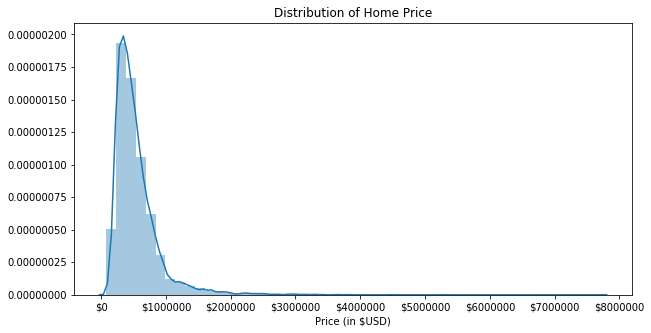

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['price'])
plt.title('Distribution of Home Price')
plt.xlabel('Price (in $USD)')
formatter = ticker.FormatStrFormatter('$%1.f')
ax.xaxis.set_major_formatter(formatter)


#'${x:,.0f}'

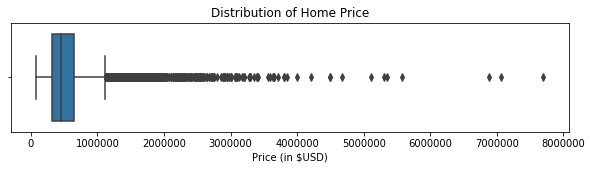

In [7]:
plt.figure(figsize=(10,2))
sns.boxplot(df['price'])
plt.title('Distribution of Home Price')
plt.xlabel('Price (in $USD)');

In [8]:
df.loc[df['price'] > 1300000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
69,1802000060,6/12/2014,1330000.0,5,2.25,3200,20158,1.0,0.0,0.0,...,8,1600,1600.0,1965,0.0,98004,47.6303,-122.215,3390,20158
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,...,8,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275
153,7855801670,4/1/2015,2250000.0,4,3.25,5180,19850,2.0,0.0,3.0,...,12,3540,1640.0,2006,0.0,98006,47.5620,-122.162,3160,9750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21535,1561750040,12/24/2014,1380000.0,5,4.50,4350,13405,2.0,0.0,0.0,...,11,4350,0.0,2014,0.0,98074,47.6018,-122.060,3990,7208
21552,524059330,1/30/2015,1700000.0,4,3.50,3830,8963,2.0,0.0,0.0,...,10,3120,710.0,2014,0.0,98004,47.5990,-122.197,2190,10777
21560,9253900271,1/7/2015,3570000.0,5,4.50,4850,10584,2.0,1.0,4.0,...,10,3540,1310.0,2007,0.0,98008,47.5943,-122.110,3470,18270
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,...,10,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125


#### Bedrooms
- Change item listed as having 33 bedrooms to 3
- drop outliers (anything > 7 bedrooms)

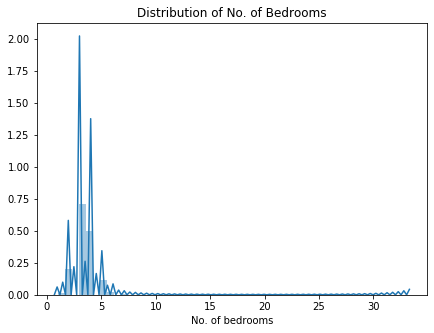

In [9]:
plt.figure(figsize=(7,5))
sns.distplot(df['bedrooms'])
plt.title('Distribution of No. of Bedrooms')
plt.xlabel('No. of bedrooms');

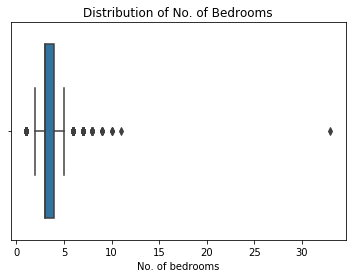

In [10]:
sns.boxplot(df['bedrooms'])
plt.title('Distribution of No. of Bedrooms')
plt.xlabel('No. of bedrooms');

In [11]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
df.loc[df['bedrooms']>=10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


#### Bathrooms
- skewed right, log transform this variable
- outliers anything > 4 bathrooms

In [13]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

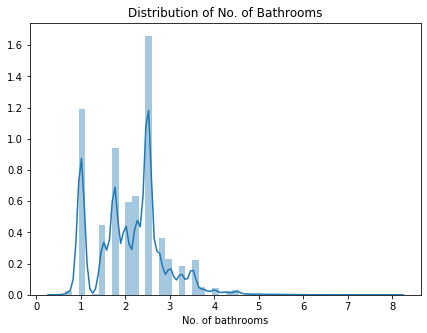

In [14]:
plt.figure(figsize=(7,5))
sns.distplot(df['bathrooms'])
plt.title('Distribution of No. of Bathrooms')
plt.xlabel('No. of bathrooms');

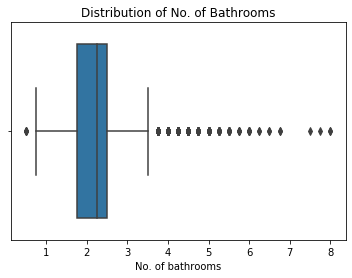

In [15]:
sns.boxplot(df['bathrooms'])
plt.title('Distribution of No. of Bathrooms')
plt.xlabel('No. of bathrooms');

#### Square-feet Living Space
- outliers include anything > than 4500

In [16]:
df.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

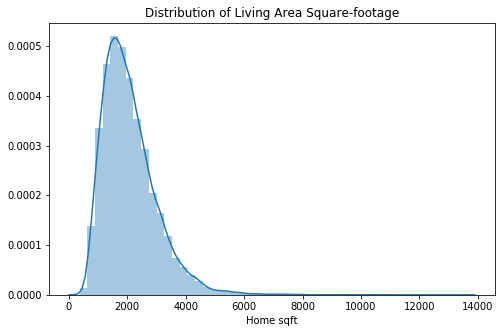

In [17]:
plt.figure(figsize=(8, 5))
sns.distplot(df['sqft_living'])
plt.title('Distribution of Living Area Square-footage')
plt.xlabel('Home sqft');

This feature is fairly normally distributed with a right-hand skew.

In [18]:
len(df.loc[df['sqft_living'] >=4500])

375

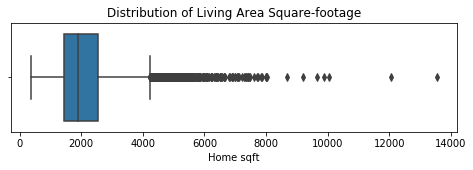

In [19]:
plt.figure(figsize=(8,2))
sns.boxplot(df['sqft_living'])
plt.title('Distribution of Living Area Square-footage')
plt.xlabel('Home sqft');

#### Lot Square-footage
- outliers anything > 17,500 in lot square-footage

In [20]:
df.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

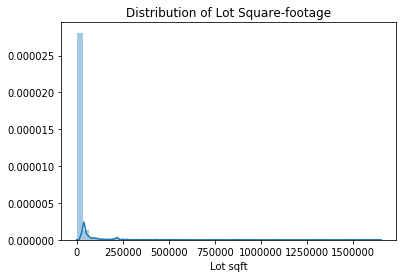

In [21]:
sns.distplot(df['sqft_lot'])
plt.title('Distribution of Lot Square-footage')
plt.xlabel('Lot sqft');

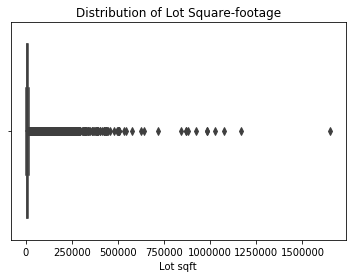

In [22]:
sns.boxplot(df['sqft_lot'])
plt.title('Distribution of Lot Square-footage')
plt.xlabel('Lot sqft');

There is so much right-hand skew within this feature, it is hard to visually examine the distribution of these values.  I will temporarily remove some outliers in order to generate more useful visualizations.

In [23]:
sqftdf = df.loc[df['sqft_lot']<=20000]
len(sqftdf)

19291

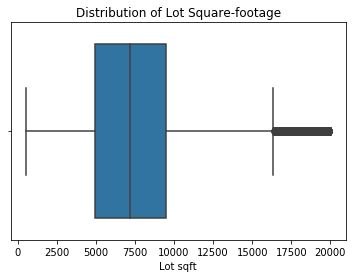

In [24]:
sns.boxplot((sqftdf['sqft_lot']))
plt.title('Distribution of Lot Square-footage')
plt.xlabel('Lot sqft');

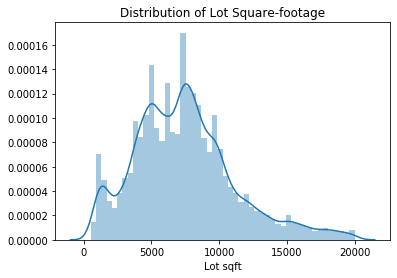

In [25]:
sns.distplot(sqftdf['sqft_lot']);
plt.title('Distribution of Lot Square-footage')
plt.xlabel('Lot sqft');

#### Floors
- heavy right-hand skew
- no outliers to remove

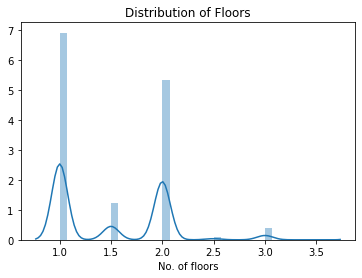

In [26]:
sns.distplot(df['floors'])
plt.title('Distribution of Floors')
plt.xlabel('No. of floors');

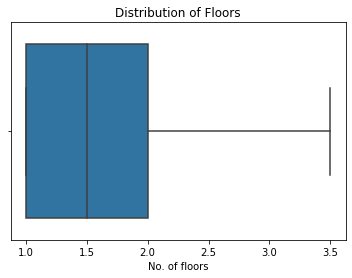

In [27]:
sns.boxplot(df['floors'])
plt.title('Distribution of Floors')
plt.xlabel('No. of floors');

#### Waterfront
- categorical

In [28]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

#### View
- categorical
- not sure what this column means exactly; may change to just binary 0 or 1 values

/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


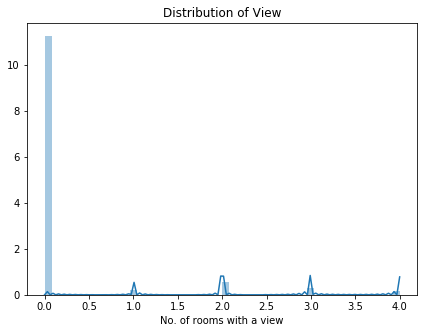

In [29]:
plt.figure(figsize=(7,5))
sns.distplot(df['view'])
plt.title('Distribution of View')
plt.xlabel('No. of rooms with a view');

In [30]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

#### Condition
- very non-normally distributed, left-skew

In [31]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

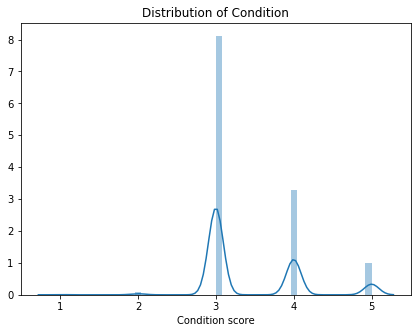

In [32]:
plt.figure(figsize=(7,5))
sns.distplot(df['condition'])
plt.title('Distribution of Condition')
plt.xlabel('Condition score');

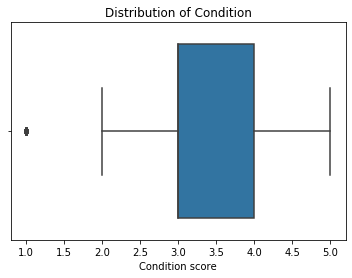

In [33]:
sns.boxplot(df['condition'])
plt.title('Distribution of Condition')
plt.xlabel('Condition score');

#### Grade
- fairly normally distributed
- outliers on both sides of the distribution indicate kurtosis

In [34]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

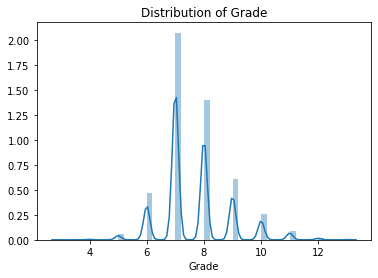

In [35]:
sns.distplot(df['grade'])
plt.title('Distribution of Grade')
plt.xlabel('Grade');

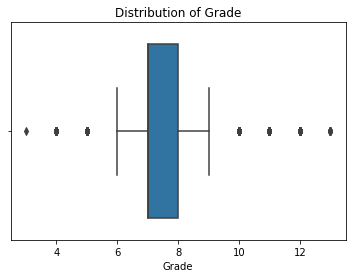

In [36]:
sns.boxplot(df['grade'])
plt.title('Distribution of Grade')
plt.xlabel('Grade');

#### Above-ground square-footage
- outliers are anything > 4000
- some right skew

In [37]:
df.sqft_above.describe()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [38]:
df['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

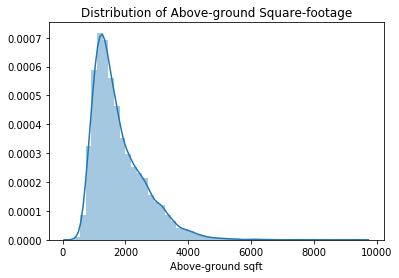

In [39]:
sns.distplot(df['sqft_above'])
plt.title('Distribution of Above-ground Square-footage')
plt.xlabel('Above-ground sqft');

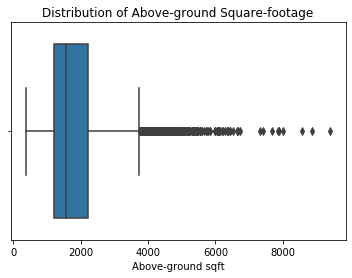

In [40]:
sns.boxplot(df['sqft_above'])
plt.title('Distribution of Above-ground Square-footage')
plt.xlabel('Above-ground sqft');

In [41]:
len(df.loc[df['sqft_above'] >= 4000])

418

#### Basement square-footage
- change ?'s to 0
- 0 heavy
- not normally distributed
- this may make a good binary categorical variable for existence of a basement

In [42]:
df.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [43]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
4130.0        1
915.0         1
1798.0        1
2190.0        1
784.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [44]:
df['sqft_basement'].replace(to_replace='?', value=0.0, inplace=True)

In [45]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

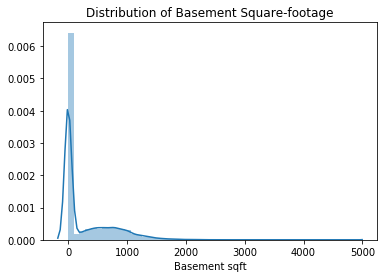

In [46]:
sns.distplot(df['sqft_basement'])
plt.title('Distribution of Basement Square-footage')
plt.xlabel('Basement sqft');

In [47]:
df.loc[(df['sqft_basement']>0) & (df['sqft_basement']>2000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
239,5152100060,5/29/2014,472000.0,6,2.50,4410,14034,1.0,0.0,2.0,...,9,2350,2060.0,1965,0.0,98003,47.3376,-122.324,2600,13988
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
1197,5561400340,6/5/2014,630000.0,4,3.75,4610,40202,1.0,0.0,0.0,...,10,2500,2110.0,1980,0.0,98027,47.4599,-122.000,3050,41056
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1.0,NaN,...,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1421,1370801331,8/4/2014,1400000.0,4,2.50,4040,9630,1.0,0.0,3.0,...,9,2020,2020.0,1951,0.0,98199,47.6408,-122.410,3160,8025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,5/28/2014,1400000.0,4,3.25,4700,9160,1.0,0.0,NaN,...,11,2520,2180.0,2005,0.0,98116,47.5744,-122.406,2240,8700
20444,9808100150,4/2/2015,3350000.0,5,3.75,5350,15360,1.0,0.0,1.0,...,11,3040,2310.0,2008,0.0,98004,47.6480,-122.218,3740,15940
20822,3425069117,8/28/2014,1280000.0,6,5.25,6160,27490,2.0,0.0,0.0,...,11,4040,2120.0,2007,0.0,98074,47.6094,-122.023,4225,9100
20957,1239400650,11/7/2014,1240000.0,4,3.50,4700,10183,1.0,0.0,2.0,...,11,2660,2040.0,2002,0.0,98033,47.6728,-122.189,3770,9000


#### Year built
- not normally distributed, but no serious outliers

In [48]:
df.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

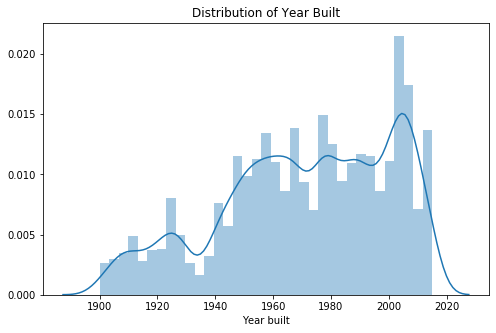

In [49]:
plt.figure(figsize=(8,5))
sns.distplot(df['yr_built'])
plt.title('Distribution of Year Built')
plt.xlabel('Year built');

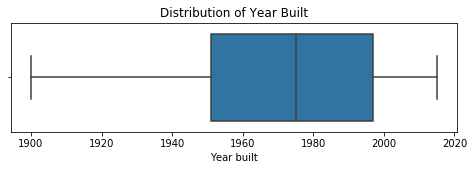

In [50]:
plt.figure(figsize=(8,2))
sns.boxplot(df['yr_built'])
plt.title('Distribution of Year Built')
plt.xlabel('Year built');

#### Year renovated
- mostly 0's, with only 744 values > 1900
- convert to binary categorical variable

In [51]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kevingiroux/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


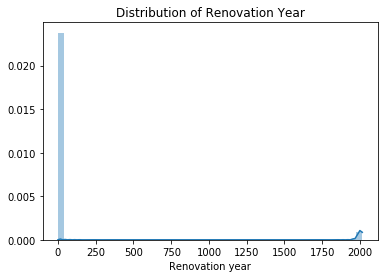

In [52]:
sns.distplot(df['yr_renovated'])
plt.title('Distribution of Renovation Year')
plt.xlabel('Renovation year');

In [53]:
len(df.loc[df['yr_renovated'] >= 1900])

744

#### Zipcode
- categorical, with 70 different zipcodes present in the data
- fairly uniform distribution, with most zipcodes having a couple hundred associated data points on average
- may be a candidate for dropping this column

In [54]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

#### Latitude + longitude
- even more uniformly distributed than zipcodes
- all coordinates are generally around 47 latitude and -122 longitude
- perhaps zipcodes is a better proxy for testing the effects of house location

In [55]:
df['lat'].value_counts()

47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
           ..
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

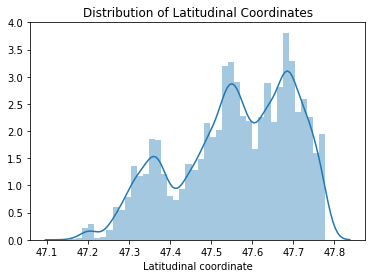

In [56]:
sns.distplot(df['lat'])
plt.title('Distribution of Latitudinal Coordinates')
plt.xlabel('Latitudinal coordinate');

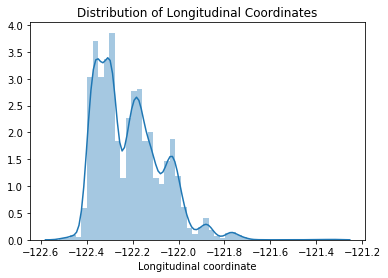

In [57]:
sns.distplot(df['long'])
plt.title('Distribution of Longitudinal Coordinates')
plt.xlabel('Longitudinal coordinate');

#### Avg square-footage of neighboring 15 homes
- outliers include any item > 4000

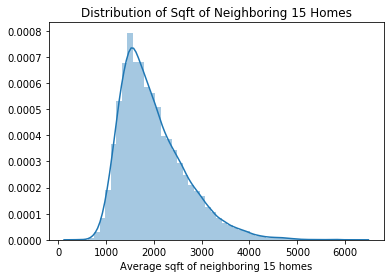

In [58]:
sns.distplot(df['sqft_living15'])
plt.title('Distribution of Sqft of Neighboring 15 Homes')
plt.xlabel('Average sqft of neighboring 15 homes');

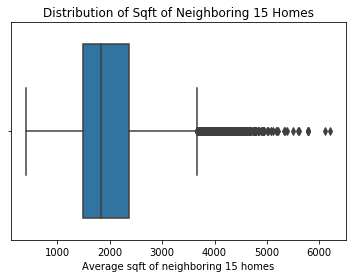

In [59]:
sns.boxplot(df['sqft_living15'])
plt.title('Distribution of Sqft of Neighboring 15 Homes')
plt.xlabel('Average sqft of neighboring 15 homes');

#### Avg square-footage of neighboring 15 lots
- outliers include any items above 20,000

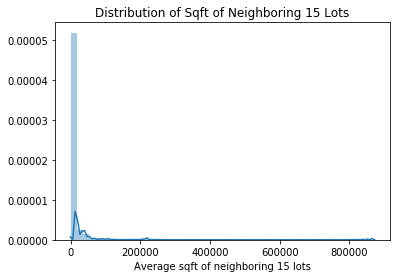

In [60]:
sns.distplot(df['sqft_lot15'])
plt.title('Distribution of Sqft of Neighboring 15 Lots')
plt.xlabel('Average sqft of neighboring 15 lots');

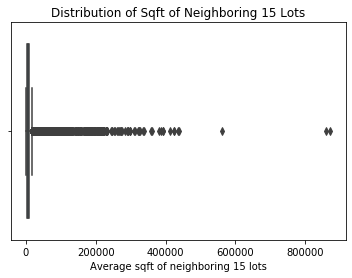

In [61]:
sns.boxplot(df['sqft_lot15'])
plt.title('Distribution of Sqft of Neighboring 15 Lots')
plt.xlabel('Average sqft of neighboring 15 lots');

To make these visualizations more useful, I will filter out the outliers to get a better view of the main distribution

In [62]:
lot15df = df.loc[df['sqft_lot15']<=30000]

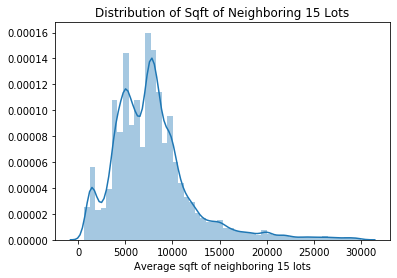

In [63]:
sns.distplot(lot15df['sqft_lot15'])
plt.title('Distribution of Sqft of Neighboring 15 Lots')
plt.xlabel('Average sqft of neighboring 15 lots');

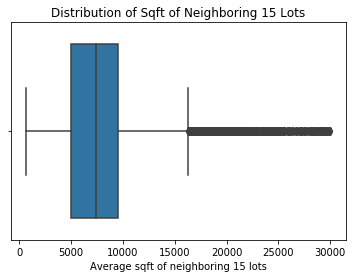

In [64]:
sns.boxplot(lot15df['sqft_lot15'])
plt.title('Distribution of Sqft of Neighboring 15 Lots')
plt.xlabel('Average sqft of neighboring 15 lots');

## Baseline Multiple Linear Model
This model will serve as a baseline model for comparison of model predictability strength as I further clean, tidy, and manipulate the independent variables.  

In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
outcome = 'price'
predictors = df.drop(['id','price','date'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [67]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2053.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:12:41   Log-Likelihood:            -2.1503e+05
No. Observations:               15762   AIC:                         4.301e+05
Df Residuals:                   15743   BIC:                         4.302e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.304e+06   3.48e+06      1.525      0.127   -1.52e+06    1.21e+07
bedrooms      -3.748e+04   2219.730    -16.885      0.000   -4.18e+04   -3.31e+04
bathrooms      4.471e+04   3864.373     11.570      0.000    3.71e+04    5.23e+04
sqft_living     138.2403     21.531      6.421      0.000      96.038     180.443
sqft_lot          0.0935      0.056      1.663      0.096      -0.017       0.204
floors         4010.0042   4268.522      0.939      0.348   -4356.788    1.24e+04
waterfront     6.097e+05   2.05e+04     29.670      0.000    5.69e+05     6.5e+05
view           5.285e+04   2552.840     20.701      0.000    4.78e+04    5.78e+04
condition      2.657e+04   2785.845      9.536      0.000    2.11e+04     3.2e+04
grade          9.378e+04   2570.957     36.477      0.000    8.87e+04    9.88e+04
sqft_above       54.4738     21.476      2.536      0.011      12.378      96.570
sqft_basement    16.5713     21.295      0.778      0.436     -25.169      58.311
yr_built      -2674.3686     85.959    -31.112      0.000   -2842.859   -2505.879
yr_renovated     19.8744      4.368      4.550      0.000      11.312      28.437
zipcode        -570.9484     39.079    -14.610      0.000    -647.547    -494.350
lat             6.04e+05   1.27e+04     47.572      0.000    5.79e+05    6.29e+05
long          -2.173e+05   1.56e+04    -13.957      0.000   -2.48e+05   -1.87e+05
sqft_living15    15.5929      4.110      3.794      0.000       7.537      23.649
sqft_lot15       -0.3374      0.085     -3.987      0.000      -0.503      -0.172
==============================================================================
Omnibus:                    13690.254   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1489290.087
Skew:                           3.666   Prob(JB):                         0.00
Kurtosis:                      50.052   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our baseline model using all provided features, unmodified, returns an adjusted R-squared value of .701.  This is the number to beat in future iterations of the model.

# Data Cleaning & Feature Engineering

## Multicollinearity
### Analysis

In [68]:
corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace = True)
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.cc>.6) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grade, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758
"(sqft_above, sqft_living15)",0.731767
"(sqft_lot, sqft_lot15)",0.718204
"(sqft_living15, grade)",0.713867
"(sqft_living, price)",0.701917


The following 4 features appear highly correlated with each other:
- sqft_living
- sqft_above
- grade
- sqft_living15

Additional strong correlation exists between the following two pairs of features:
- bathrooms & sqft_living
- sqft_lot & sqft_lot15


### Conclusions
Based on the above, I will drop the following columns to minimize multicollinearity:
- sqft_above
- grade
- sqft_living15
- bathrooms
- sqft_lot15

## Continuous variables
### Outlier removal

In [69]:
# PRICE
# drop outliers (anything > 1.5 million in price)
df = df[df['price']<=1300000]

In [70]:
# BEDROOMS
# Change item listed as having 33 bedrooms to 3
# drop outliers (anything > 6 bedrooms)
df = df[df['bedrooms'] <= 6]
df['bedrooms'].loc[df['bedrooms'] == 33].replace(to_replace=33, value=3, inplace=True)

Series([], Name: bedrooms, dtype: int64)

In [71]:
# BATHROOMS
# drop outliers (anything > 5 bathrooms)
#df = df[df['bathrooms'] <= 5]

In [72]:
# LIVING SPACE SQUARE-FOOTAGE
# drop outliers (anything > 4500)
df = df[df['sqft_living'] <= 4500]

In [73]:
# LOT SQUARE-FOOTAGE
# drop outliers (anything > 17,500)
df = df[df['sqft_lot'] <= 17500]

In [74]:
# ABOVE GROUND SQUARE-FOOTAGE
# remove outliers (anything > 4500)
#df = df[df['sqft_above'] <= 4500]

In [75]:
# AVG LIVING AREA SQ-FTAGE OF NEIGHBORS
# remove outliers (anything > 4500)
#df = df[df['sqft_living15'] <= 4500]

In [76]:
# AVG LIVING AREA SQ-FTAGE OF NEIGHBORS
# remove outliers (anything > 20,000)
#df = df[df['sqft_lot15'] <= 20000]

### Log transformations

In [77]:
bedrooms_log = np.log(df['bedrooms'])
#bathrooms_log = np.log(df['bathrooms'])
sqft_living_log = np.log(df['sqft_living'])
sqft_lot_log = np.log(df['sqft_lot'])
#sqft_above_log = np.log(df['sqft_above'])
#sqft_living15_log = np.log(df['sqft_living15'])
#sqft_lot15_log = np.log(df['sqft_lot15'])
yr_built_log = np.log(df['yr_built'])
lat_log = np.log(df['lat'])
long_log = np.log(abs(df['long']))
floors_log = np.log(df['floors'])
condition_log = np.log(df['condition'])

### Normalization

In [78]:
scaled_bedrooms = (bedrooms_log-np.mean(bedrooms_log))/np.sqrt(np.var(bedrooms_log))
scaled_sqftliving = (sqft_living_log-np.mean(sqft_living_log))/np.sqrt(np.var(sqft_living_log))
scaled_sqftlot = (sqft_lot_log-np.mean(sqft_lot_log))/np.sqrt(np.var(sqft_lot_log))
scaled_yrbuilt = (yr_built_log-np.mean(yr_built_log))/np.sqrt(np.var(yr_built_log))
scaled_lat = (lat_log-np.mean(lat_log))/np.sqrt(np.var(lat_log))
scaled_long = (long_log-np.mean(long_log))/np.sqrt(np.var(long_log))

## Categorical variables
### Dummy variable creation
Create dummy variables for View, Zipcode, Basement and Year Renovated

In [79]:
view_cat = pd.get_dummies(df['view'], prefix='view', prefix_sep='_', drop_first=True)
zipcode_cat = pd.get_dummies(df['zipcode'], prefix='zip', prefix_sep='_', drop_first=True)

In [80]:
view_cat.columns

Index(['view_1.0', 'view_2.0', 'view_3.0', 'view_4.0'], dtype='object')

In [81]:
view_cat.rename(columns={'view_1.0':'view_1',
                         'view_2.0':'view_2',
                         'view_3.0':'view_3',
                         'view_4.0':'view_4'}, inplace=True)

In [82]:
# creating a dummy variable for the existance of a basement in each home based on basement square-footage
# since this feature has a mode of 0

basement_cat = []

for i in df['sqft_basement']:
    if i == 0:
        basement_cat.append(0)
    else:
        basement_cat.append(1)

In [83]:
# creating a dummy variable for whether the home has ever had a renovation
# since this feature has a mode of 0

renovation_cat = []

for i in df['yr_renovated']:
    if i == 0:
        renovation_cat.append(0)
    else:
        renovation_cat.append(1)

In [84]:
price = df['price']
len(price)

18311

## Summary of cleaning activity:

- Bedrooms - outliers removed, log transformed, and normalized
- Sqft Living - outliers removed, log transformed, and normalized
- Sqft Lot - outliers removed, log transformed, and normalized
- Year built - log transformed and normalized
- Lat and long - log transformed and normalized
- Floors - log transformed
- Condition - log transformed


- Basement - mode of 0; converted to single dummy column indicated whether house has a basement or not
- Year renovated - mode of 0; converted to single dummy column indicated whether the house has ever been renovated
- Zipcode - converted to dummy variable, with a column for each zipcode
- View - converted to dummy variable, with a column for each value of View
- Waterfront - no changes (this was already a single column, categorical feature)


- Bathrooms - dropped
- Grade - dropped
- Above ground - dropped
- Neighbors living and lot - dropped

In [85]:
df2 = pd.DataFrame({'price':price,
                     'scaled_bedrooms':scaled_bedrooms,
                     'scaled_sqftliving':scaled_sqftliving,
                     'scaled_sqftlot':scaled_sqftlot,
                     'scaled_yrbuilt':scaled_yrbuilt,
                     'scaled_lat':scaled_lat,
                     'scaled_long':scaled_long,
                     'floors_log':floors_log,
                     'condition_log':condition_log,
                     'basement_cat':basement_cat,
                     'renovation_cat':renovation_cat})

In [86]:
df2 = pd.concat([df2,view_cat,zipcode_cat], axis=1)
len(df2)

18311

In [87]:
df3 = pd.DataFrame({'price':price,
                     'scaled_bedrooms':scaled_bedrooms,
                     'scaled_sqftliving':scaled_sqftliving,
                     'scaled_sqftlot':scaled_sqftlot,
                     'scaled_yrbuilt':scaled_yrbuilt,
                     'scaled_lat':scaled_lat,
                     'scaled_long':scaled_long,
                     'floors_log':floors_log,
                     'condition_log':condition_log,
                     'basement_cat':basement_cat,
                     'renovation_cat':renovation_cat})
df3 = pd.concat([df3,view_cat], axis=1)

# Model fitting

## Train-Test Split

### Splitting the data

In [88]:
from sklearn.model_selection import train_test_split
X = df2.drop('price', axis=1)
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
print(len(X_train), len(X_test), len(y_train), len(y_test))

14648 3663 14648 3663


In [89]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
print(len(train_df), len(test_df))

14648 3663


### Fitting the initial multi-linear model

In [90]:
outcome = 'price'
predictors = train_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [91]:
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     694.0
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:12:42   Log-Likelihood:            -1.8941e+05
No. Observations:               14648   AIC:                         3.790e+05
Df Residuals:                   14564   BIC:                         3.796e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.627e+05   1.63e+04      9.965      0.000    1.31e+05    1.95e+05
scaled_bedrooms   -1.323e+04   1137.524    -11.632      0.000   -1.55e+04    -1.1e+04
scaled_sqftliving  1.146e+05   1503.887     76.222      0.000    1.12e+05    1.18e+05
scaled_sqftlot     3.136e+04   1433.787     21.872      0.000    2.86e+04    3.42e+04
scaled_yrbuilt     7412.2863   1322.940      5.603      0.000    4819.156       1e+04
scaled_lat         4178.2070   7287.222      0.573      0.566   -1.01e+04    1.85e+04
scaled_long        9371.9328   5417.527      1.730      0.084   -1247.108       2e+04
floors_log          4.44e+04   3925.956     11.309      0.000    3.67e+04    5.21e+04
condition_log      7.022e+04   5166.297     13.593      0.000    6.01e+04    8.04e+04
basement_cat      -2.598e+04   2252.514    -11.532      0.000   -3.04e+04   -2.16e+04
renovation_cat     5879.1682   2054.924      2.861      0.004    1851.256    9907.081
view_1             7.184e+04   7445.417      9.649      0.000    5.73e+04    8.64e+04
view_2             8.854e+04   4467.423     19.819      0.000    7.98e+04    9.73e+04
view_3             1.396e+05   6869.057     20.323      0.000    1.26e+05    1.53e+05
view_4             2.793e+05   1.01e+04     27.678      0.000    2.59e+05    2.99e+05
zip_98002          1.984e+04   1.08e+04      1.833      0.067   -1378.198    4.11e+04
zip_98003          8439.9734   9812.293      0.860      0.390   -1.08e+04    2.77e+04
zip_98004          5.858e+05   1.98e+04     29.520      0.000    5.47e+05    6.25e+05
zip_98005          3.824e+05   2.04e+04     18.708      0.000    3.42e+05    4.22e+05
zip_98006          3.375e+05   1.68e+04     20.057      0.000    3.05e+05     3.7e+05
zip_98007          2.935e+05   2.07e+04     14.148      0.000    2.53e+05    3.34e+05
zip_98008           2.74e+05   2.02e+04     13.584      0.000    2.34e+05    3.14e+05
zip_98010          1.121e+05    2.1e+04      5.342      0.000     7.1e+04    1.53e+05
zip_98011           1.56e+05   2.63e+04      5.928      0.000    1.04e+05    2.08e+05
zip_98014          1.226e+05   3.43e+04      3.577      0.000    5.54e+04     1.9e+05
zip_98019          1.001e+05   2.88e+04      3.473      0.001    4.36e+04    1.57e+05
zip_98022           3.01e+04   1.68e+04      1.790      0.074   -2870.172    6.31e+04
zip_98023         -2460.5976   9228.484     -0.267      0.790   -2.05e+04    1.56e+04
zip_98024          1.646e+05   3.02e+04      5.444      0.000    1.05e+05    2.24e+05
zip_98027          2.978e+05   1.82e+04     16.379      0.000    2.62e+05    3.33e+05
zip_98028          1.392e+05   2.55e+04      5.455      0.000    8.92e+04    1.89e+05
zip_98029          2.941e+05   1.98e+04     14.835      0.000    2.55e+05    3.33e+05
zip_98030          1.653e+04   1.08e+04      1.527      0.127   -4696.551

### Results
As a result of the above data cleaning efforts,  our observed adjusted R-squared value has improved by about 10 percentage points, to .793

## Fitting the model

Currently our train and test datasets have 83 features.  Below, I will write a function that removes the least important feature, one at a time, and re-runs a multi-linear regression to calculate the adjusted r-square value for each new version of the model.  The goal is to identify the feature set that will return the maximum adjusted r-square value for the model.

### Recursive feature elimination

#### QUESTION 1:  HOW DOES THE NUMBER OF FEATURES INCLUDED IN THE MODEL AFFECT THE R-SQAURED VALUE FOR THE MODEL?

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def stepwise_rfe(data, target):
    
    # DATA takes a dataframe with both predictors and target features for regression analysis
    # TARGET takes the name of the columns containing target values as a string
    
    featurecount = []
    rsq = []
    
    for i in range(len(data.columns)-2):
    
        # ISOLATE PREDICTIVE FEATURES
        predictors = data.drop(target, axis=1)
        y = data[target]
        n = (len(predictors.columns) - i)
        
        # SET UP AND RUN RFE 
        linreg = LinearRegression()
        selector = RFE(linreg, n_features_to_select=(n))
        selector = selector.fit(predictors, y)
        
        # DROP COLUMN WITH LEAST PREDICTIVE POWER             
        features = pd.Series(data.columns)
        RFEresult = pd.Series(selector.support_)
        select_feats = pd.concat([features, RFEresult], axis=1)
        keep = select_feats.loc[select_feats[1] == True]
        keep = list(keep[0])
        
        # FIT A MULTIPLE LINEAR MODEL           
        predictors = predictors[keep]
        newdata = pd.concat([predictors, y], axis=1)
        outcome = 'price'
        pred_sum = '+'.join(predictors.columns)
        formula = outcome + '~' + pred_sum
        model = ols(formula=formula, data=newdata).fit()
        
        # APPEND FEATURE COUNT AND RESULTING ADJ RSQ VALUE TO LISTS
        featurecount.append(len(predictors.columns))
        rsq.append(model.rsquared_adj)
                       
    featurecount = pd.Series(featurecount)
    rsq = pd.Series(rsq)
    rfe_df = pd.concat([featurecount, rsq], axis=1)
    return rfe_df

In [93]:
rfe_df = stepwise_rfe(train_df, 'price')
rfe_df = rfe_df.rename(columns={0:'feature_count', 1:'r_sq'})
rfe_df.sort_values(by='r_sq', ascending=False)

,feature_count,r_sq
3,80,0.797077
2,81,0.797068
1,82,0.797055
0,83,0.797041
4,79,0.796977
...,...,...
77,6,0.140671
78,5,0.117766
79,4,0.092740
80,3,0.071061


#### ANSWER 1

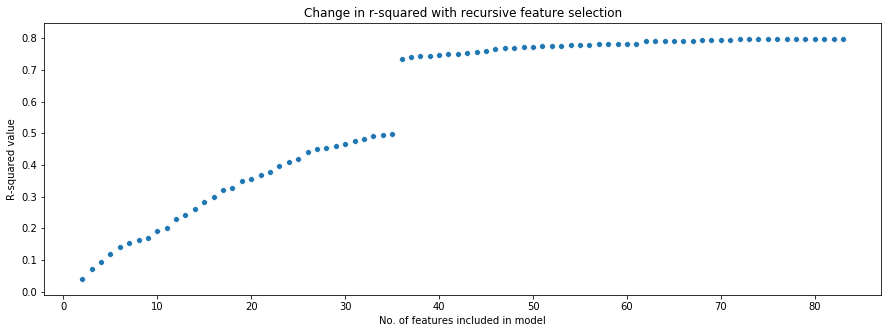

In [94]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=rfe_df['feature_count'], y=rfe_df['r_sq'])
plt.xlabel('No. of features included in model')
plt.ylabel('R-squared value')
plt.title('Change in r-squared with recursive feature selection');

Based on the above calculations and visualization, it looks like a model with 80 features returns the strongest adjusted R-squared value:  0.797

Further, as predictor variables are removed, the R-squared value drops, with the largest decline happening between a model that includes 36 predictor variables and a model that includes 35 predictor variables.

### Stepwise forward selection

Below I will import a function I found on the internet that will perform stepwise forward selection of the features in my dataset to double check my finding from above that our adjusted r-squared value for the model is maximized at 80 predictive features.

In [95]:
# The below code was taken from the internet, 
# SOURCE: https://planspace.org/20150423-forward_selection_with_statsmodels/

import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [96]:
model2 = forward_selected(train_df, 'price')

In [97]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     711.2
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:39   Log-Likelihood:            -1.8941e+05
No. Observations:               14648   AIC:                         3.790e+05
Df Residuals:                   14566   BIC:                         3.796e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.654e+05   1.54e+04     10.708      0.000    1.35e+05    1.96e+05
scaled_sqftliving  1.146e+05   1503.350     76.239      0.000    1.12e+05    1.18e+05
scaled_lat         4363.5387   7282.142      0.599      0.549   -9910.383    1.86e+04
zip_98040          5.155e+05   1.63e+04     31.607      0.000    4.84e+05    5.47e+05
zip_98004          5.834e+05   1.91e+04     30.576      0.000    5.46e+05    6.21e+05
zip_98112           5.46e+05   1.94e+04     28.211      0.000    5.08e+05    5.84e+05
zip_98155          1.427e+05   2.45e+04      5.818      0.000    9.46e+04    1.91e+05
zip_98133          1.621e+05   2.36e+04      6.884      0.000    1.16e+05    2.08e+05
view_4             2.792e+05   1.01e+04     27.676      0.000    2.59e+05    2.99e+05
zip_98028          1.361e+05    2.5e+04      5.448      0.000    8.71e+04    1.85e+05
zip_98034           1.99e+05    2.3e+04      8.663      0.000    1.54e+05    2.44e+05
zip_98019          1.003e+05   2.77e+04      3.615      0.000    4.59e+04    1.55e+05
zip_98011          1.534e+05   2.58e+04      5.956      0.000    1.03e+05    2.04e+05
zip_98125          2.114e+05   2.27e+04      9.320      0.000    1.67e+05    2.56e+05
zip_98072          1.654e+05   2.61e+04      6.344      0.000    1.14e+05    2.16e+05
view_2             8.862e+04   4466.305     19.842      0.000    7.99e+04    9.74e+04
view_3             1.397e+05   6868.503     20.333      0.000    1.26e+05    1.53e+05
zip_98177          2.286e+05   2.46e+04      9.286      0.000     1.8e+05    2.77e+05
zip_98006          3.358e+05   1.58e+04     21.286      0.000    3.05e+05    3.67e+05
zip_98119          5.024e+05   2.05e+04     24.499      0.000    4.62e+05    5.43e+05
zip_98178          6.186e+04   1.31e+04      4.724      0.000    3.62e+04    8.75e+04
zip_98199          4.316e+05      2e+04     21.599      0.000    3.92e+05    4.71e+05
zip_98109          5.129e+05   2.16e+04     23.782      0.000    4.71e+05    5.55e+05
basement_cat      -2.594e+04   2251.709    -11.519      0.000   -3.04e+04   -2.15e+04
zip_98102          5.099e+05   2.14e+04     23.789      0.000    4.68e+05    5.52e+05
condition_log      7.021e+04   5165.626     13.592      0.000    6.01e+04    8.03e+04
zip_98116          3.384e+05   1.65e+04     20.489      0.000    3.06e+05    3.71e+05
zip_98105          4.596e+05   2.12e+04     21.723      0.000    4.18e+05    5.01e+05
zip_98122          3.926e+05   1.81e+04     21.703      0.000    3.57e+05    4.28e+05
zip_98136           2.93e+05   1.52e+04     19.233      0.000    2.63e+05    3.23e+05
zip_98022          3.071e+04   1.48e+04      2.079      0.038    1753.031    5.97e+04
zip_98039          7.097e+05   3.95e+04     17.978      0.000    6.32e+05    7.87e+05
zip_98075           3.33e+05   1.95e+04     17.066      0.000    2.95e+05

In [98]:
model2.rsquared_adj

0.7970568112060344

Forward stepwise selection also yielded a model containing 81 features, with an adjusted R-squared value of .793

### Final feature selection
I will use the features included in the forward stepwise calculation, but will remove those features whose p-values are above the alpha threshold of .05, starting with the removal of 'scaled_lat' which has the highest remaining p-value of .549

#### Removal of 'zip98092'

In [99]:
feats_and_pvals = dict(model2.pvalues)
new_features = list(feats_and_pvals.keys())

In [100]:
new_features

['Intercept',
 'scaled_sqftliving',
 'scaled_lat',
 'zip_98040',
 'zip_98004',
 'zip_98112',
 'zip_98155',
 'zip_98133',
 'view_4',
 'zip_98028',
 'zip_98034',
 'zip_98019',
 'zip_98011',
 'zip_98125',
 'zip_98072',
 'view_2',
 'view_3',
 'zip_98177',
 'zip_98006',
 'zip_98119',
 'zip_98178',
 'zip_98199',
 'zip_98109',
 'basement_cat',
 'zip_98102',
 'condition_log',
 'zip_98116',
 'zip_98105',
 'zip_98122',
 'zip_98136',
 'zip_98022',
 'zip_98039',
 'zip_98075',
 'zip_98005',
 'zip_98168',
 'zip_98014',
 'zip_98027',
 'scaled_bedrooms',
 'view_1',
 'zip_98029',
 'scaled_long',
 'scaled_sqftlot',
 'floors_log',
 'zip_98058',
 'zip_98055',
 'zip_98108',
 'zip_98106',
 'zip_98146',
 'zip_98056',
 'zip_98188',
 'zip_98031',
 'zip_98077',
 'zip_98010',
 'zip_98198',
 'zip_98053',
 'zip_98052',
 'zip_98144',
 'zip_98103',
 'zip_98033',
 'zip_98107',
 'zip_98115',
 'zip_98117',
 'zip_98126',
 'zip_98007',
 'zip_98074',
 'zip_98008',
 'zip_98118',
 'zip_98059',
 'zip_98166',
 'zip_98065',
 '

In [101]:
new_features.remove('Intercept')
new_features.remove('scaled_lat')

In [102]:
predictors = train_df[new_features]
outcome = 'price'
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model1 = ols(formula=formula, data=train_df).fit()

In [103]:
model1.rsquared_adj

0.7970657406827185

This adjusted r-squared value of .797065 has increased from the forward stepwise adjusted r-squared value of .797056 calculated in section 4.2.2.  I will continue by removing the features with the next highest p-values below: 

#### Function definition: stepwise feature removal

In order to simplify this process, I will write a function that removes the feature with the highest p-value greater than .05 and then re-runs the multi-linear model.

In [104]:
def stepwise_feature_removal(model, data):

    feats_and_pvals = dict(model.pvalues)
    new_features = list(feats_and_pvals.keys())
    new_features.remove('Intercept')
    max_p_df = pd.DataFrame.from_dict(feats_and_pvals, orient='index')
    max_p_df.rename(columns={0:'pvals'}, inplace=True)
    max_p_df = max_p_df.sort_values('pvals', ascending=False)
    max_p_df = max_p_df.reset_index()

    if max_p_df['pvals'][0] > .05:
        removed_feature = max_p_df['index'][0]
        new_features.remove(max_p_df['index'][0])
        predictors = data[new_features]
        outcome = 'price'
        pred_sum = '+'.join(predictors.columns)
        formula = outcome + '~' + pred_sum
        newmodel = ols(formula=formula, data=data).fit()
        return removed_feature, new_features, newmodel

    else:
        return print('All p-values are statistically significant, at alpha=.05')

#### Removal of remaining features with p-value > .05

In [105]:
removed_feature, new_features, model2 = stepwise_feature_removal(model1, train_df)
print("Removed feature: {}".format(removed_feature))
print("New adjusted r-squared: {}".format(model2.rsquared_adj))

Removed feature: zip_98023
New adjusted r-squared: 0.7970689057944762


In [106]:
removed_feature, new_features, model3 = stepwise_feature_removal(model2, train_df)
print("Removed feature: {}".format(removed_feature))
print("New adjusted r-squared: {}".format(model3.rsquared_adj))

Removed feature: zip_98070
New adjusted r-squared: 0.7970537406667587


In [107]:
removed_feature, new_features, model4 = stepwise_feature_removal(model3, train_df)
print("Removed feature: {}".format(removed_feature))
print("New adjusted r-squared: {}".format(model4.rsquared_adj))

Removed feature: zip_98032
New adjusted r-squared: 0.7970217344161542


In [108]:
removed_feature, new_features, model5 = stepwise_feature_removal(model4, train_df)
print("Removed feature: {}".format(removed_feature))
print("New adjusted r-squared: {}".format(model5.rsquared_adj))

Removed feature: zip_98022
New adjusted r-squared: 0.79698845042783


In [109]:
removed_feature, new_features, model6 = stepwise_feature_removal(model5, train_df)
print("Removed feature: {}".format(removed_feature))
print("New adjusted r-squared: {}".format(model6.rsquared_adj))

Removed feature: zip_98030
New adjusted r-squared: 0.7969789024711151


In [110]:
removed_feature, new_features, model7 = stepwise_feature_removal(model6, train_df)
print("Removed feature: {}".format(removed_feature))
print("New adjusted r-squared: {}".format(model7.rsquared_adj))

Removed feature: zip_98002
New adjusted r-squared: 0.7969712620153953


In [111]:
removed_feature, new_features, model8 = stepwise_feature_removal(model7, train_df)
print("Removed feature: {}".format(removed_feature))
print("New adjusted r-squared: {}".format(model8.rsquared_adj))

Removed feature: scaled_long
New adjusted r-squared: 0.7969638641159289


In [112]:
removed_feature, new_features, model9 = stepwise_feature_removal(model8, train_df)
print("Removed feature: {}".format(removed_feature))
print("New adjusted r-squared: {}".format(model9.rsquared_adj))

Removed feature: zip_98031
New adjusted r-squared: 0.7969303367635534


In [113]:
stepwise_feature_removal(model9, train_df)

All p-values are statistically significant, at alpha=.05


## Final model summary

In [114]:
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     799.3
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:19:42   Log-Likelihood:            -1.8942e+05
No. Observations:               14648   AIC:                         3.790e+05
Df Residuals:                   14575   BIC:                         3.795e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.663e+05   7176.311     23.170      0.000    1.52e+05     1.8e+05
scaled_sqftliving  1.145e+05   1503.143     76.198      0.000    1.12e+05    1.17e+05
zip_98040          5.138e+05   8590.247     59.813      0.000    4.97e+05    5.31e+05
zip_98004          5.813e+05   9231.381     62.972      0.000    5.63e+05    5.99e+05
zip_98112          5.521e+05   8750.665     63.091      0.000    5.35e+05    5.69e+05
zip_98155          1.536e+05   6121.486     25.085      0.000    1.42e+05    1.66e+05
zip_98133          1.756e+05   5664.404     30.993      0.000    1.64e+05    1.87e+05
view_4             2.809e+05   1.01e+04     27.944      0.000    2.61e+05    3.01e+05
zip_98028          1.423e+05   7514.937     18.929      0.000    1.28e+05    1.57e+05
zip_98034          2.007e+05   5510.999     36.409      0.000     1.9e+05    2.11e+05
zip_98019          8.317e+04      1e+04      8.304      0.000    6.35e+04    1.03e+05
zip_98011           1.56e+05   9022.838     17.287      0.000    1.38e+05    1.74e+05
zip_98125          2.206e+05   6263.474     35.223      0.000    2.08e+05    2.33e+05
zip_98072          1.633e+05   9350.030     17.462      0.000    1.45e+05    1.82e+05
view_2             8.858e+04   4463.862     19.844      0.000    7.98e+04    9.73e+04
view_3             1.407e+05   6847.356     20.546      0.000    1.27e+05    1.54e+05
zip_98177          2.442e+05   8255.499     29.575      0.000    2.28e+05     2.6e+05
zip_98006          3.277e+05   6300.358     52.016      0.000    3.15e+05     3.4e+05
zip_98119          5.144e+05   9712.811     52.962      0.000    4.95e+05    5.33e+05
zip_98178          5.965e+04   7630.370      7.817      0.000    4.47e+04    7.46e+04
zip_98199          4.465e+05   7336.049     60.859      0.000    4.32e+05    4.61e+05
zip_98109          5.233e+05   1.23e+04     42.431      0.000    4.99e+05    5.47e+05
basement_cat      -2.575e+04   2247.681    -11.457      0.000   -3.02e+04   -2.13e+04
zip_98102          5.181e+05   1.23e+04     42.131      0.000    4.94e+05    5.42e+05
condition_log      7.075e+04   5157.489     13.718      0.000    6.06e+04    8.09e+04
zip_98116          3.505e+05   7131.002     49.148      0.000    3.36e+05    3.64e+05
zip_98105          4.668e+05   8940.452     52.207      0.000    4.49e+05    4.84e+05
zip_98122          3.982e+05   7869.999     50.599      0.000    3.83e+05    4.14e+05
zip_98136          3.035e+05   7743.999     39.195      0.000    2.88e+05    3.19e+05
zip_98039          7.104e+05   3.55e+04     19.990      0.000    6.41e+05     7.8e+05
zip_98075          3.154e+05   7592.668     41.535      0.000       3e+05     3.3e+05
zip_98005          3.753e+05   1.07e+04     34.916      0.000    3.54e+05    3.96e+05
zip_98168          4.872e+04   7738.764      6.296      0.000    3.36e+04

# Confirmation of linear regression assumptions

## Checking the full model 

### Homoskedasticity

The residuals of our model are fairly homoskedastic.

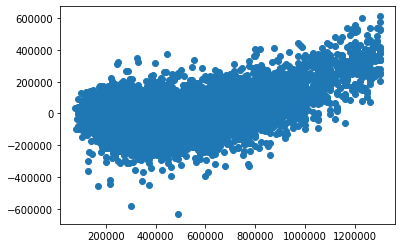

In [115]:
plt.scatter(x=train_df['price'], y=model9.resid)

### Normality

The QQ Plot for our model shows some signs of fat tails in the residuals, especially on the top end, but is mostly normal overall.  The fat tail at the top may be a result of chopping so many outliers out of the model.

In [116]:
import scipy.stats as stats

Text(0.5, 1.0, 'QQ Plot: Multi Linear Home Price Model')

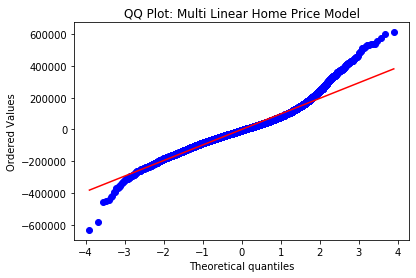

In [117]:
stats.probplot(model9.resid, dist="norm", plot=plt);
plt.title('QQ Plot: Multi Linear Home Price Model')

## Checking select variables
### ANOVA test
An ANOVA test confirms that all of our predictor variables are statistically significant in the context of this regression.

In [118]:
table = sm.stats.anova_lm(model9, typ=2)
tabledf = pd.DataFrame(table)
tabledf['PR(>F)'].sort_values(ascending=False)

zip_98042            0.037720
renovation_cat       0.004562
zip_98198            0.000617
zip_98188            0.000288
zip_98148            0.000007
                       ...   
zip_98116            0.000000
zip_98102            0.000000
zip_98109            0.000000
scaled_sqftliving    0.000000
Residual                  NaN
Name: PR(>F), Length: 73, dtype: float64

### Residual plots (for continuous variables)

Visual analysis of the residuals plot for 'scaled_sqftliving' confirms homoskedasticity of this variable.

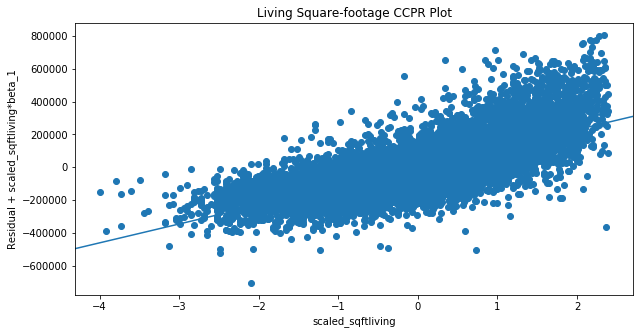

In [119]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(10,5))
    fig = sm.graphics.plot_ccpr(model9, exog_idx='scaled_sqftliving')
    plt.title('Living Square-footage CCPR Plot')

As for the 'scaled_sqftlot' variable, the residuals plot uncovers some minor heteroskedasticity.

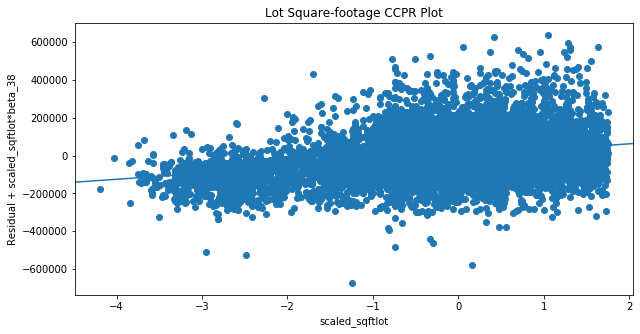

In [120]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(10,5))
    fig = sm.graphics.plot_ccpr(model9, exog_idx='scaled_sqftlot')
    plt.title('Lot Square-footage CCPR Plot')

The 'scaled_yrbuilt' variable displays strong homoskedasticity.

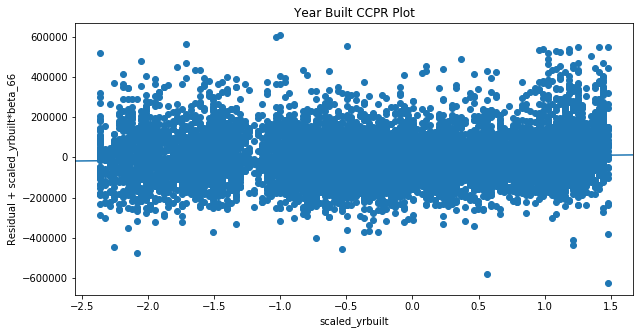

In [121]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(10,5))
    fig = sm.graphics.plot_ccpr(model9, exog_idx='scaled_yrbuilt')
    plt.title('Year Built CCPR Plot')

### QQ Plots

The QQ plot for living square-footage indicates some left-hand skew in the data, but confirms the overall normality of this variable's sample data distribution.

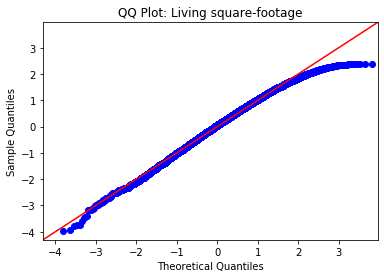

In [122]:
sm.graphics.qqplot(train_df['scaled_sqftliving'], dist='norm', line='45')
plt.title('QQ Plot: Living square-footage');


The below QQ plot indicates a bit of a left-hand skew in the lot square-footage data -- this could be due to the removal of a large portion of outliers from the right-hand side of the distribution prior to analysis.

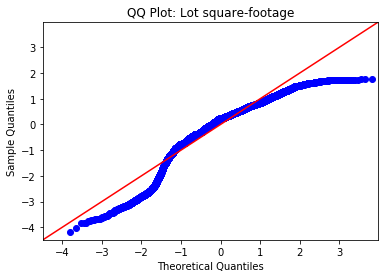

In [123]:
sm.graphics.qqplot(train_df['scaled_sqftlot'], dist='norm', line='45')
plt.title('QQ Plot: Lot square-footage');

The below QQ plot has an 'S' shape to it, typical of distributions that are under-dispursed (aka have thinner tails than a normal distribution).   

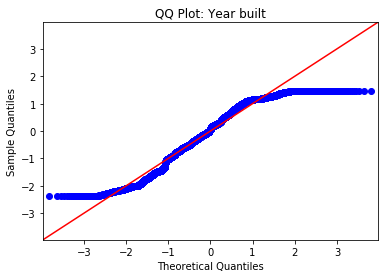

In [124]:
sm.graphics.qqplot(train_df['scaled_yrbuilt'], dist='norm', line='45')
plt.title('QQ Plot: Year built');

The below QQ plot looks mostly normally distributed, with a slight left-hand skew.

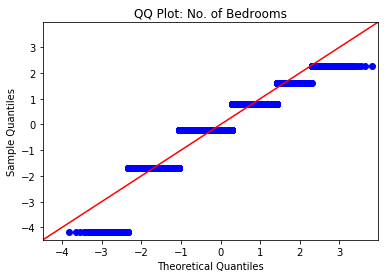

In [125]:
sm.graphics.qqplot(train_df['scaled_bedrooms'], dist='norm', line='45')
plt.title('QQ Plot: No. of Bedrooms');

### Partial regression plots

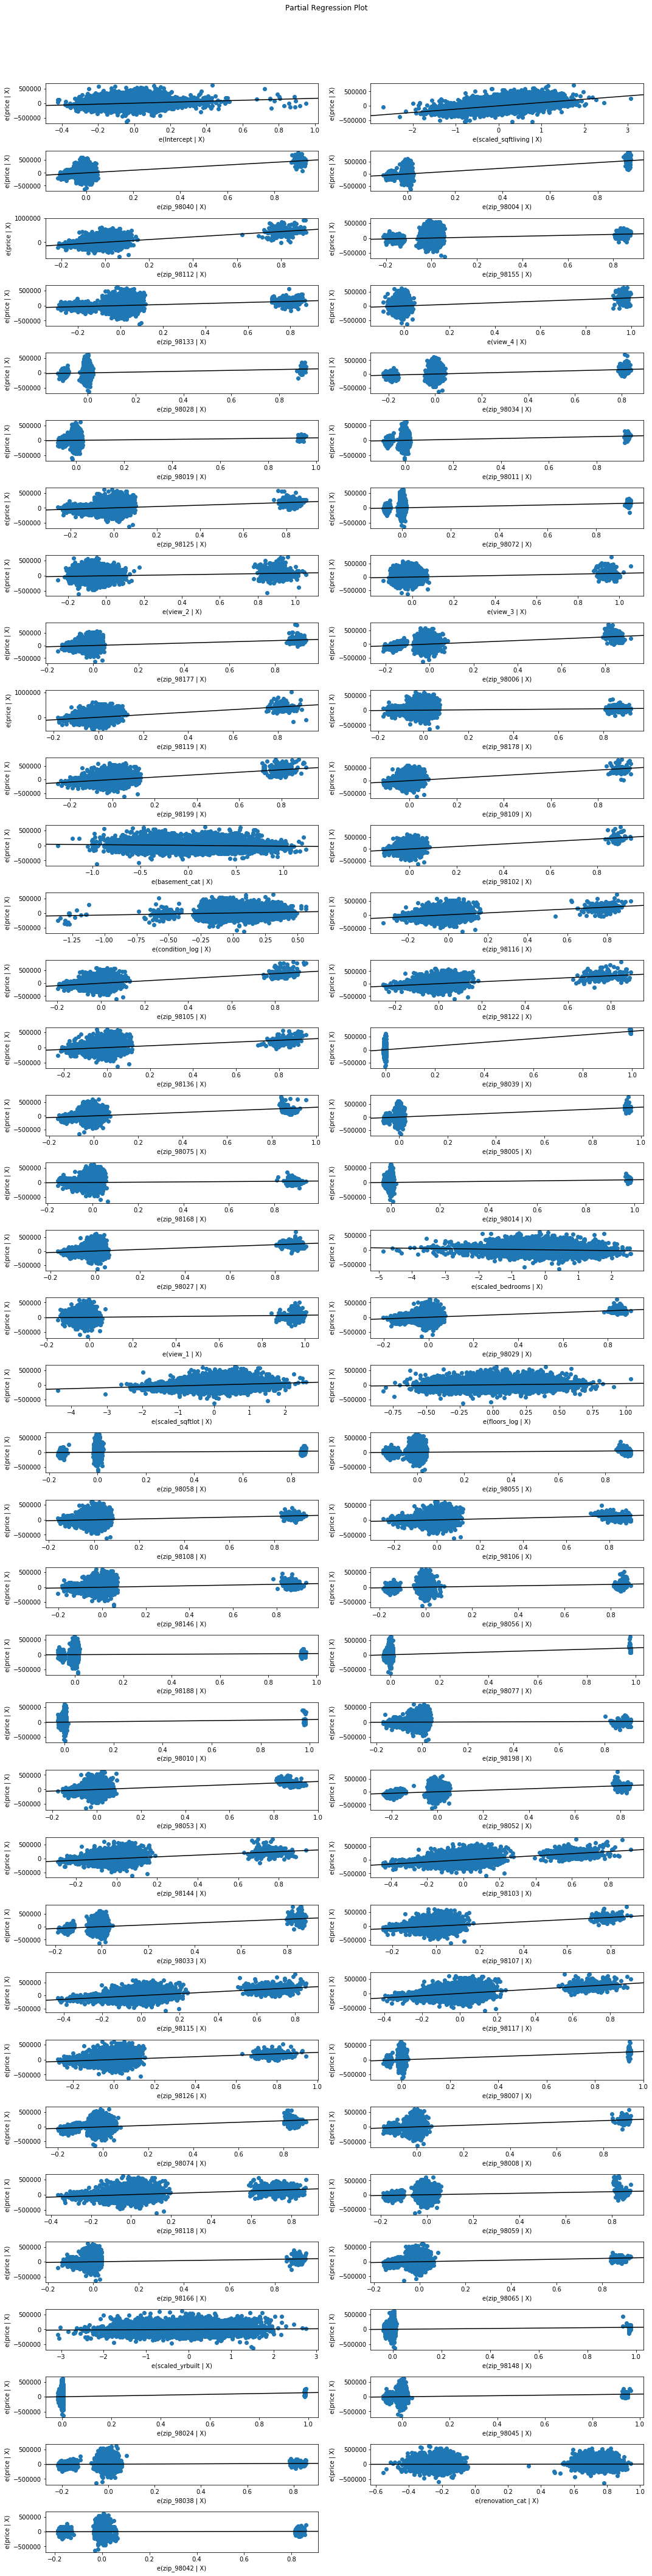

In [126]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(15,60))
    fig = sm.graphics.plot_partregress_grid(model9)

### Fitted values vs. actuals, by continuous feature

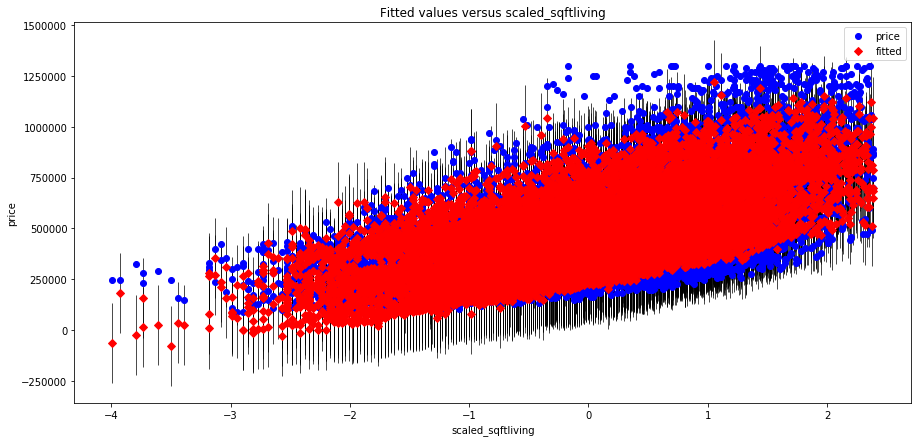

In [127]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(15,7))
    xfig = sm.graphics.plot_fit(model9, "scaled_sqftliving")

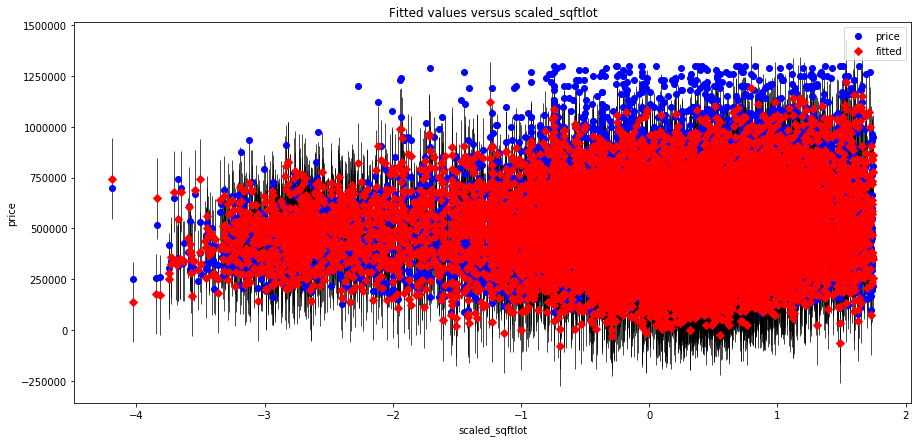

In [128]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(15,7))
    xfig = sm.graphics.plot_fit(model9, "scaled_sqftlot")

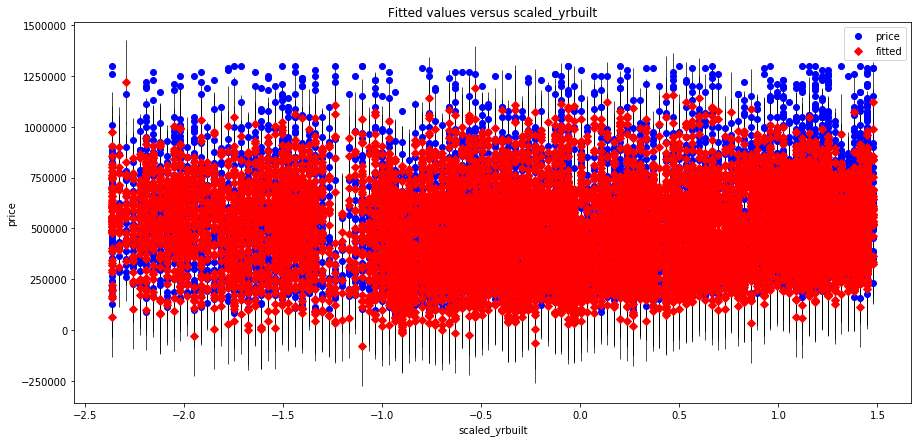

In [129]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(15,7))
    xfig = sm.graphics.plot_fit(model9, "scaled_yrbuilt")

# Model validation

## Test data Adj. R-squared

In [130]:
predictors = test_df[new_features]
outcome = 'price'
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
lmmodel = ols(formula=formula, data=test_df).fit()

In [131]:
lmmodel.rsquared_adj

0.7980505436670554

Our adjusted R-squared is approximately the same for our test data and our training data, indicating the model successfully predicts prices based on testing data at least as well as it predicted prices based on training data.

Below, I will calculate the RMSE for our training and test predictions to better understand the model's accuracy.

In [132]:
# Updating training and test data sets with the features selected in model6 above.

X_train = X_train[new_features]
X_test = X_test[new_features]

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [133]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [134]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 9989793642.987268
Test Mean Squared Error: 9651723629.15678


In [135]:
# Standard deviation of the TRAIN response variable's housing price prediction error
np.sqrt(9989793642.987268)

99948.95518707171

In [136]:
# Standard deviation of the TEST response variable's housing price prediction error
np.sqrt(9651723629.15678)

98243.18617164643

In [137]:
# Standard deviation of difference in the TRAINING and TEST predicted home value
np.sqrt(9989793642.987268)-np.sqrt(9651723629.15678)

1705.7690154252778

## K-folds cross validation to confirm the RMSE

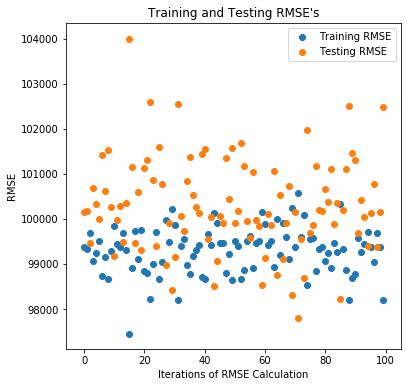

In [138]:
num = 100
train_err = []
test_err = []
diff = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(np.sqrt(mean_squared_error(y_train, y_hat_train)))
    test_err.append(np.sqrt(mean_squared_error(y_test, y_hat_test)))
    diff.append(np.sqrt(mean_squared_error(y_train, y_hat_train))-np.sqrt(mean_squared_error(y_test, y_hat_test)))
plt.figure(figsize=(6,6))
plt.scatter(list(range(num)), train_err, label='Training RMSE')
plt.scatter(list(range(num)), test_err, label='Testing RMSE')
plt.title("Training and Testing RMSE's")
plt.ylabel('RMSE')
plt.xlabel('Iterations of RMSE Calculation')
plt.legend();

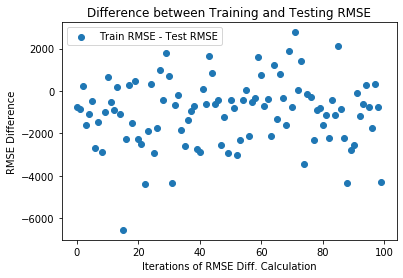

In [139]:
plt.scatter(list(range(num)), diff, label='Train RMSE - Test RMSE')
plt.title('Difference between Training and Testing RMSE')
plt.ylabel('RMSE Difference')
plt.xlabel('Iterations of RMSE Diff. Calculation')
plt.legend();

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
full_df = pd.concat([train_df, test_df], axis=0)
full_df = full_df.reset_index()
full_df.drop('index', axis=1, inplace=True)
X = full_df.drop('price', axis=1)

In [142]:
cv_20_results = np.mean(cross_val_score(linreg, X, full_df['price'], cv=20, scoring='neg_mean_squared_error'))

In [143]:
np.sqrt(abs(cv_20_results))

100037.00729442663

The above cross-validated RMSE value of 100,037 comes very close to our calculated RMSE values of 99,949 for the training dataset and 98,243 for the test dataset.

## Non-tech Visualization
### QUESTION 2:  What is the standard deviation of the model's prediction error?

Text(0.5, 1.0, 'Error in Predicted Price, by Actual Price')

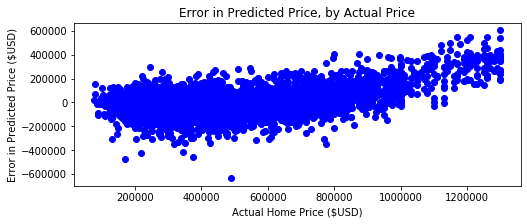

In [144]:
trainerr = y_train-y_hat_train
testerr = y_test-y_hat_test
plt.figure(figsize=(8,3))
#plt.scatter(y_train, trainerr, color='blue')
plt.scatter(y_test,testerr, color='blue')
plt.xlabel('Actual Home Price ($USD)')
plt.ylabel('Error in Predicted Price ($USD)')
plt.title('Error in Predicted Price, by Actual Price')

In [145]:
testerr.describe()

count      6043.000000
mean        471.440439
std      102492.190550
min     -636868.295227
25%      -57737.679324
50%       -4632.180729
75%       47691.444088
max      607173.576174
Name: price, dtype: float64

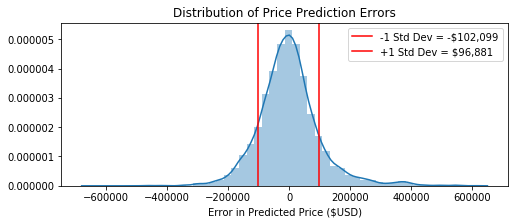

In [146]:
plt.figure(figsize=(8,3))
sns.distplot(testerr)
plt.axvline(x=(-2609-99722), color='red', label='-1 Std Dev = -$102,099')
plt.axvline(x=(-2609+99722), color='red', label='+1 Std Dev = $96,881')
plt.xlabel('Error in Predicted Price ($USD)')
plt.legend()
plt.title("Distribution of Price Prediction Errors");

### ANSWER 2:
- Our model's mean error in the prediction of home price based on testing data is - 2608
- The standard deviation of the prediction error is 99,490.
- This means that approximately 68 percent of the time, the model will predict a home's price between approx. -102k and approx +97k of the home's actual price.

# Further exploration

There are a ton of zipcode dummy variables, and a quick look at some of their residual charts indicates a lot of heteroskedasticity among these variables.  However, some quick online research indicated that heteroskedasticity can result in very low p-values for a given feature, making it difficult to identify and remove the problematic zipcodes.  Below, I explore what happens to my model by first removing the zipcode feature set entirely, and then by removing the lot square-footage feature (whose residuals also displayed relatively strong heteroskedasticity above).

## Removal of zipcode features

In [147]:
# Removing the latitude, and longitude features to match the final model above's feature set (excl. zipcodes)
df3 = df3.drop(['scaled_lat', 'scaled_long'], axis=1)

List of features in updated feature set:

In [148]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18311 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              18311 non-null  float64
 1   scaled_bedrooms    18311 non-null  float64
 2   scaled_sqftliving  18311 non-null  float64
 3   scaled_sqftlot     18311 non-null  float64
 4   scaled_yrbuilt     18311 non-null  float64
 5   floors_log         18311 non-null  float64
 6   condition_log      18311 non-null  float64
 7   basement_cat       18311 non-null  int64  
 8   renovation_cat     18311 non-null  int64  
 9   view_1             18311 non-null  uint8  
 10  view_2             18311 non-null  uint8  
 11  view_3             18311 non-null  uint8  
 12  view_4             18311 non-null  uint8  
dtypes: float64(7), int64(2), uint8(4)
memory usage: 1.5 MB


In [149]:
predictors = df3.drop('price', axis=1)
outcome = 'price'
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
newmodel = ols(formula=formula, data=test_df).fit()

In [150]:
newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     263.1
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:20:13   Log-Likelihood:                -49079.
No. Observations:                3663   AIC:                         9.818e+04
Df Residuals:                    3650   BIC:                         9.826e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.015e+05   2.07e+04     19.362      0.000    3.61e+05    4.42e+05
scaled_bedrooms   -2.563e+04   3627.402     -7.067      0.000   -3.27e+04   -1.85e+04
scaled_sqftliving   1.63e+05   4592.608     35.497      0.000    1.54e+05    1.72e+05
scaled_sqftlot    -3.475e+04   3679.995     -9.442      0.000    -4.2e+04   -2.75e+04
scaled_yrbuilt    -5.994e+04   3323.095    -18.038      0.000   -6.65e+04   -5.34e+04
floors_log         5.613e+04   1.23e+04      4.571      0.000    3.21e+04    8.02e+04
condition_log      3.897e+04   1.58e+04      2.461      0.014    7920.495       7e+04
basement_cat      -1.151e+04   6876.433     -1.674      0.094    -2.5e+04    1970.563
renovation_cat     1.596e+04   6578.336      2.426      0.015    3061.652    2.89e+04
view_1             1.172e+05   2.07e+04      5.655      0.000    7.66e+04    1.58e+05
view_2             8.565e+04   1.38e+04      6.188      0.000    5.85e+04    1.13e+05
view_3             1.718e+05   2.15e+04      7.975      0.000     1.3e+05    2.14e+05
view_4             2.815e+05   3.71e+04      7.595      0.000    2.09e+05    3.54e+05
==============================================================================
Omnibus:                      374.435   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.968
Skew:                           0.719   Prob(JB):                    4.35e-137
Kurtosis:                       4.430   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adj. r-squared value of this new model is .462, significantly lower than the adj. r-squared of approximately .79 that was calculated in the original final model above.

In [151]:
X = df3.drop('price', axis=1)
y = df3['price']
linreg = LinearRegression()
linreg.fit(X, y)
y_hat = linreg.predict(X)

In [152]:
rmse = np.sqrt(mean_squared_error(y, y_hat))

print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 162657.23455270522


The above RMSE is significantly higher than the RMSE of approximately 99,000 calculated with the model that included dummy variables for each zipcode, indicating that the model with zipcodes included is more accurate.

## Removal of lot square-footage feature

Given our learnings from section 7.1, I want to plug the zipcode dummy variables back into the model and this time remove the 'lot square-footage' variable.

In [153]:
# Starting with new_features, the list of features used in our final original model, and dropping 'scaled_sqftlot'
new_features.remove('scaled_sqftlot')

In [154]:
predictors = train_df[new_features]
outcome = 'price'
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
newmodel2 = ols(formula=formula, data=train_df).fit()
newmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     778.4
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:20:14   Log-Likelihood:            -1.8965e+05
No. Observations:               14648   AIC:                         3.795e+05
Df Residuals:                   14576   BIC:                         3.800e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           2.01e+05   7112.097     28.263      0.000    1.87e+05    2.15e+05
scaled_sqftliving  1.276e+05   1402.575     90.947      0.000    1.25e+05     1.3e+05
zip_98040          5.145e+05   8729.724     58.933      0.000    4.97e+05    5.32e+05
zip_98004          5.789e+05   9380.655     61.712      0.000    5.61e+05    5.97e+05
zip_98112          5.079e+05   8652.984     58.701      0.000    4.91e+05    5.25e+05
zip_98155          1.518e+05   6220.363     24.399      0.000     1.4e+05    1.64e+05
zip_98133          1.608e+05   5715.456     28.135      0.000     1.5e+05    1.72e+05
view_4             2.891e+05   1.02e+04     28.324      0.000    2.69e+05    3.09e+05
zip_98028           1.43e+05   7636.915     18.729      0.000    1.28e+05    1.58e+05
zip_98034           1.96e+05   5596.294     35.018      0.000    1.85e+05    2.07e+05
zip_98019          9.085e+04   1.02e+04      8.930      0.000    7.09e+04    1.11e+05
zip_98011          1.564e+05   9169.372     17.059      0.000    1.38e+05    1.74e+05
zip_98125          2.062e+05   6330.020     32.581      0.000    1.94e+05    2.19e+05
zip_98072          1.653e+05   9501.425     17.399      0.000    1.47e+05    1.84e+05
view_2             9.326e+04   4531.140     20.583      0.000    8.44e+04    1.02e+05
view_3             1.439e+05   6956.939     20.689      0.000     1.3e+05    1.58e+05
zip_98177          2.329e+05   8373.244     27.813      0.000    2.16e+05    2.49e+05
zip_98006          3.296e+05   6402.081     51.488      0.000    3.17e+05    3.42e+05
zip_98119          4.641e+05   9589.313     48.393      0.000    4.45e+05    4.83e+05
zip_98178          4.615e+04   7728.889      5.971      0.000     3.1e+04    6.13e+04
zip_98199           4.14e+05   7301.071     56.705      0.000       4e+05    4.28e+05
zip_98109          4.693e+05   1.23e+04     38.219      0.000    4.45e+05    4.93e+05
basement_cat      -3.853e+04   2205.633    -17.470      0.000   -4.29e+04   -3.42e+04
zip_98102          4.664e+05   1.23e+04     38.030      0.000    4.42e+05     4.9e+05
condition_log      6.754e+04   5239.134     12.891      0.000    5.73e+04    7.78e+04
zip_98116          3.158e+05   7065.243     44.695      0.000    3.02e+05     3.3e+05
zip_98105          4.266e+05   8892.185     47.976      0.000    4.09e+05    4.44e+05
zip_98122          3.511e+05   7692.719     45.643      0.000    3.36e+05    3.66e+05
zip_98136          2.742e+05   7750.782     35.375      0.000    2.59e+05    2.89e+05
zip_98039          7.123e+05   3.61e+04     19.723      0.000    6.41e+05    7.83e+05
zip_98075          3.169e+05   7715.654     41.076      0.000    3.02e+05    3.32e+05
zip_98005          3.726e+05   1.09e+04     34.116      0.000    3.51e+05    3.94e+05
zip_98168          4.874e+04   7864.464      6.198      0.000    3.33e+04

In [155]:
X = train_df[new_features]
y = train_df['price']
linreg = LinearRegression()
linreg.fit(X, y)
y_hat = linreg.predict(X)

In [156]:
rmse = np.sqrt(mean_squared_error(y, y_hat))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 101575.90090288896


The cross-validated RMSE of 102,175 is slightly higher than the RMSE calculated from the original final model in part 4.  Therefore I will leave the scaled_sqftlot variable in the model.

In [157]:
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))
np.sqrt(abs(cv_20_results))

102175.77181834978

# Exploration of select coefficients

## Coefficients and p-values

In [158]:
pvals = model9.pvalues.to_dict()
pvals_df = pd.DataFrame.from_dict(pvals, orient='index')
pvals_df = pvals_df.reset_index()
pvals_df = pvals_df.sort_values(0)
for i in range(0,len(pvals_df['index'])):
    print(pvals_df['index'][i],": ",pvals_df[0][i])

Intercept :  1.1484797351674471e-116
scaled_sqftliving :  0.0
zip_98040 :  0.0
zip_98004 :  0.0
zip_98112 :  0.0
zip_98155 :  5.448661322574124e-136
zip_98133 :  2.670595918725467e-204
view_4 :  1.937306931650489e-167
zip_98028 :  5.784778613725517e-79
zip_98034 :  7.088698226256256e-278
zip_98019 :  1.0983278429035415e-16
zip_98011 :  2.718131022943824e-66
zip_98125 :  6.52139852981054e-261
zip_98072 :  1.3575152831220344e-67
view_2 :  1.7327626022238945e-86
view_3 :  1.700770060267219e-92
zip_98177 :  9.852678131479487e-187
zip_98006 :  0.0
zip_98119 :  0.0
zip_98178 :  5.773848460439441e-15
zip_98199 :  0.0
zip_98109 :  0.0
basement_cat :  2.9359707711304927e-30
zip_98102 :  0.0
condition_log :  1.4552359032831766e-42
zip_98116 :  0.0
zip_98105 :  0.0
zip_98122 :  0.0
zip_98136 :  0.0
zip_98039 :  1.0045069512636971e-87
zip_98075 :  0.0
zip_98005 :  1.359471336979367e-256
zip_98168 :  3.1493963149003906e-10
zip_98014 :  2.2852416116249048e-07
zip_98027 :  4.893585144869585e-287
scal

## Intercept

The model intercept is 166,278 (calculated below).  This means that, prior to the inclusion of other independent variables in the calculation of a sale price prediction, the model assumes a baseline home price of USD 166,278 for each home in our dataset.

In [159]:
coeffs = model9.params.to_dict()
coeffs.get('Intercept')

166278.31275711907

## Living square-footage

The model calculated a coefficient of 127,600 for the 'scaled_sqftliving' feature, which, when multiplied by the log-transformed, standard normalized living square-footage of a house from our sample, will form a large component of our prediction of the house's price.

Text(0, 0.5, 'Count')

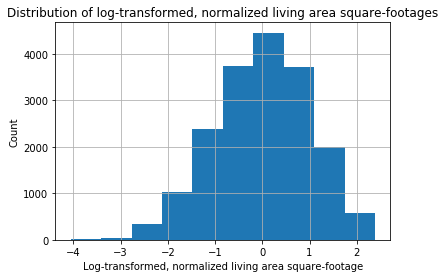

In [160]:
df2.scaled_sqftliving.hist();
plt.title("Distribution of log-transformed, normalized living area square-footages")
plt.xlabel('Log-transformed, normalized living area square-footage')
plt.ylabel('Count')

In [161]:
# I will use the mean and std deviation of the log-transformed living_sqft values to calculate the value 
# where the model does not add or subtract to the price as predicted by the other variables using the following
# equation:

# [log_base_e (x)  - mean ] / std = change to predicted price based on living_sqft

# the result when setting this equation equal to 0 is x = 1784

print(np.mean(sqft_living_log))
print(np.std(sqft_living_log))

7.4867096804724
0.3875900484908132


In [162]:
# creating dataframe with original living_sqft values, the log-transformed values, and the normalized values,
# each as their own columns

livingsqft_df = pd.DataFrame({'sqft':df['sqft_living'], 'logged':sqft_living_log, 'scaled':scaled_sqftliving})

In [163]:
# adding a calculated column for the impact to the model's price prediction based on each given house's 
# living square footage
#
# NOTE: 127,600 is the coefficient calculated with the by isolating 'x' and 'price_impact' in the below equation:
#
# [log_base_e (x)  - 7.48671 ] / 0.38759 = price_impact

livingsqft_df['pred_impact'] = livingsqft_df['scaled'].map(lambda x: x*127600)

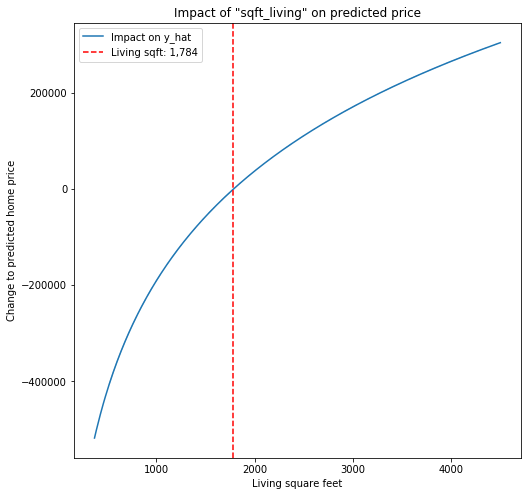

In [164]:
# Plotting the impact on predicted price based on 'living sqft' feature, with a vertical line indicating
# the living square-footage at which the impact to the model's predicted home price is 0
# try a seaborn LM plot
plt.figure(figsize=(8,8))
sns.lineplot(x='sqft', y='pred_impact', data=livingsqft_df, label='Impact on y_hat')
plt.axvline(x=2.71828**7.48671, color='red', label='Living sqft: 1,784', ls='--')
plt.title('Impact of "sqft_living" on predicted price')
plt.xlabel("Living square feet")
plt.ylabel("Change to predicted home price")
plt.legend();

### Conclusion:
- Our model assumes a hypothetical baseline living space square-footage of 1784 square feet; the model would not add or subtract any amount to the price of the home as predicted based on the other independent variables included in the model for a home with 1784 sqft of living space.
- For homes with greater than 1784 square feet of living space, the model adds to the home price as predicted by the other variables.
- For homes with less than 1784 square feet of living space, the model subtracts from the home price as predicted by the other variables.

## Zipcode

#### QUESTION 3: Is 'zipcode' a useful predictor of home price? How does 'zipcode' impact a home's predicted sale price?

As the zipcode data was neither log-transformed nor normalized, we can read the coefficient for each zipcode's dummy variable as the impact to the model's price prediction for a home in that given zipcode.

In [165]:
coeffs = model9.params.to_dict()

In [166]:
cdf = pd.DataFrame.from_dict(coeffs, orient='index')
cdf = cdf.reset_index()

In [167]:
cdf1 = cdf[cdf['index'].str.contains('zip')]

In [168]:
cdf1 = cdf1.sort_values(0, ascending=False)
cdf1.rename(columns = {'index':'zipcode', 0:'coefficient'}, inplace=True)

In [169]:
cdf1.coefficient.describe()

count        60.000000
mean     248900.871917
std      164089.688000
min       12149.781230
25%      121616.636668
50%      235262.557590
75%      361859.191002
max      710387.317355
Name: coefficient, dtype: float64

In [170]:
cdf1.head()

,zipcode,coefficient
29,zip_98039,710387.317355
3,zip_98004,581315.833801
4,zip_98112,552084.433012
21,zip_98109,523255.504112
23,zip_98102,518092.335434


In [171]:
cdf1.tail()

,zipcode,coefficient
40,zip_98058,43938.331443
46,zip_98188,37236.257985
70,zip_98038,31525.894211
49,zip_98198,25808.014080
72,zip_98042,12149.781230


#### ANSWER 3:

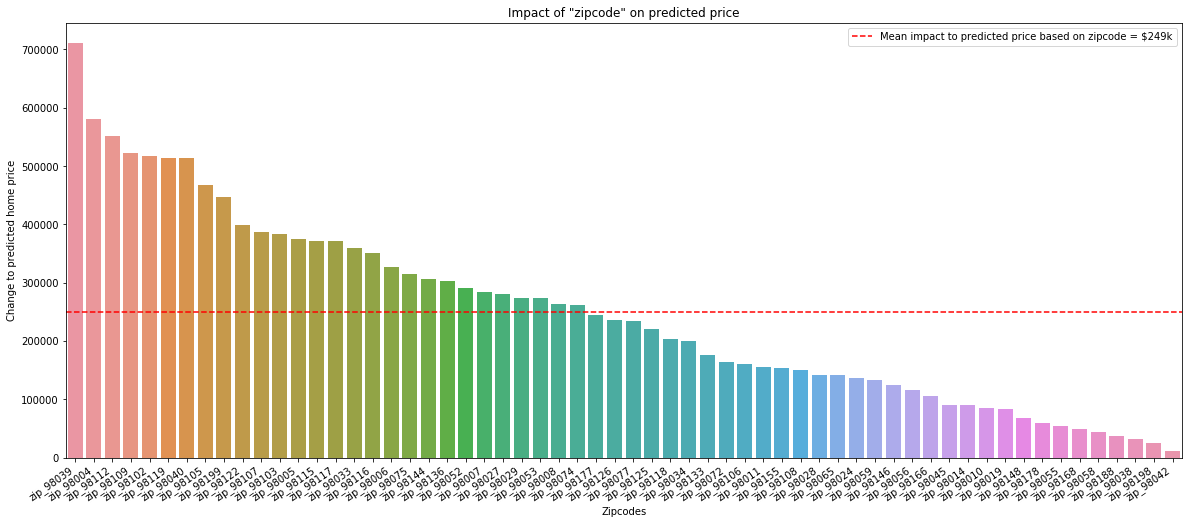

In [172]:
plt.figure(figsize=(20,8))
sns.barplot(x='zipcode', y='coefficient', data=cdf1, orient='v')
plt.axhline(y=248901, color = 'red', ls='--', label='Mean impact to predicted price based on zipcode = $249k')
plt.title('Impact of "zipcode" on predicted price')
plt.xlabel('Zipcodes')
plt.ylabel('Change to predicted home price')
plt.xticks(rotation='35', ha='right')
plt.legend();

### Conclusion:
- As displayed above, approximately 700k would be added to the predicted price of a home in zipcode 98039.
- Conversely, only around 12k would be added to the predicted price of a home in zipcode 98042.
- The mean amount added to a home's predicted price based on zipcode is 248,901

## Views

In [173]:
cdf2 = cdf[~cdf['index'].str.contains('zip')]

In [174]:
cdf2 = cdf2.set_index('index')
cdf2 = cdf2.drop(['Intercept', 'scaled_sqftliving', 'condition_log', 'floors_log', 'renovation_cat', 'basement_cat', 'scaled_sqftlot', 'scaled_yrbuilt', 'scaled_bedrooms'], axis=0)
cdf2 = cdf2.reset_index()

In [175]:
cdf2 = cdf2.sort_values(0, ascending=False)
cdf2.rename(columns = {'index':'coeffs', 0:'value'}, inplace=True)

No handles with labels found to put in legend.


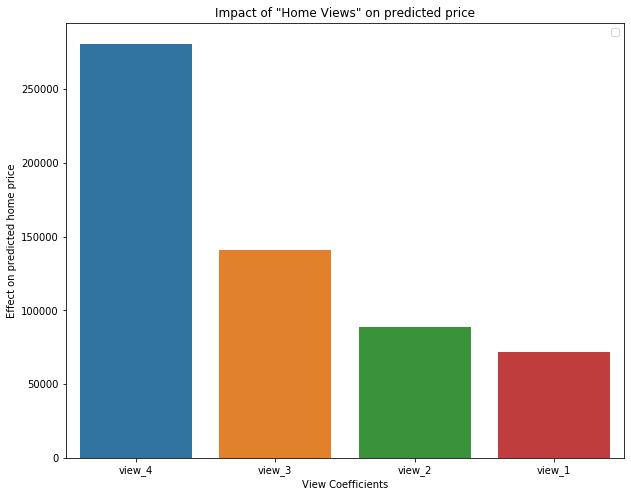

In [176]:
plt.figure(figsize=(10,8))
sns.barplot(x='coeffs', y='value', data=cdf2, orient='v')
plt.title('Impact of "Home Views" on predicted price')
plt.xlabel('View Coefficients')
plt.ylabel('Effect on predicted home price')
plt.legend();

### Conclusion:
- The model adds approx. 150k to the predicted price of homes that have been viewed 3 times.
- The model adds approx. 275k to the predicted price of homes that have been viewed 4 times (double the amount for 3!)

### Recommendation:
- Begin showing all homes in our inventory that have not had a showing yet
- Seek to show homes 3 or 4 times before closing on a deal
- Next steps: find out how more than 4 views affects predicted home price

# Business Visualizations

Exploration of all coefficients other than Zipcode and Views, in order of MOST to LEAST impact on predicted price.

## Living sqft

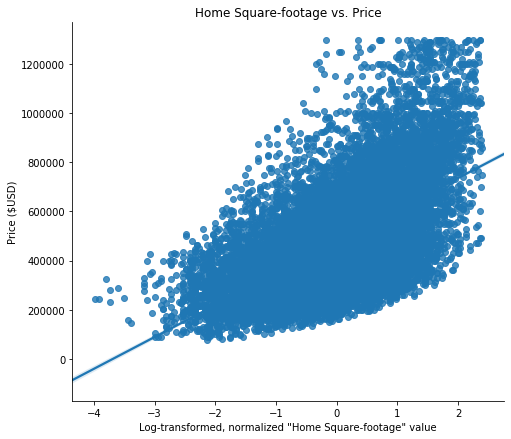

In [177]:
sns.lmplot(x='scaled_sqftliving', y='price', data=train_df, fit_reg=True, height=6, aspect=1.2)
plt.title('Home Square-footage vs. Price')
plt.xlabel('Log-transformed, normalized "Home Square-footage" value')
plt.ylabel('Price ($USD)')
plt.show();

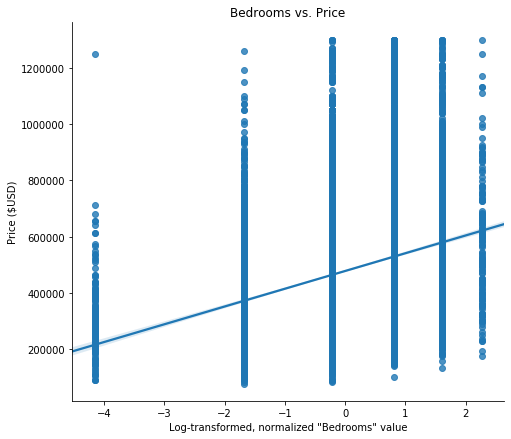

In [178]:
sns.lmplot(x='scaled_bedrooms', y='price', data=train_df, fit_reg=True, height=6, aspect=1.2)
plt.title('Bedrooms vs. Price')
plt.xlabel('Log-transformed, normalized "Bedrooms" value')
plt.ylabel('Price ($USD)')
plt.show();

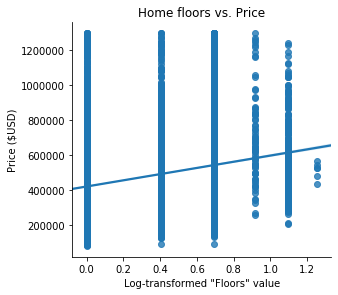

In [179]:
sns.lmplot(x='floors_log', y='price', data=train_df, fit_reg=True, height=4, aspect=1.2)
plt.title('Home floors vs. Price')
plt.xlabel('Log-transformed "Floors" value')
plt.ylabel('Price ($USD)')
plt.show();

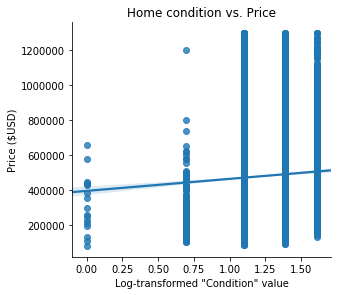

In [180]:
sns.lmplot(x='condition_log', y='price', data=train_df, fit_reg=True, height=4, aspect=1.2)
plt.title('Home condition vs. Price')
plt.xlabel('Log-transformed "Condition" value')
plt.ylabel('Price ($USD)')
plt.show();

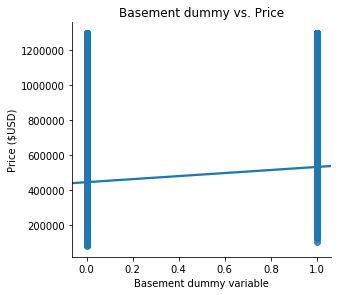

In [181]:
sns.lmplot(x='basement_cat', y='price', data=train_df, fit_reg=True, height=4, aspect=1.2)
plt.title('Basement dummy vs. Price')
plt.xlabel('Basement dummy variable')
plt.ylabel('Price ($USD)')
plt.show();

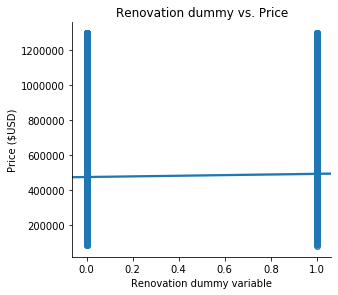

In [182]:
sns.lmplot(x='renovation_cat', y='price', data=train_df, fit_reg=True, height=4, aspect=1.2)
plt.title('Renovation dummy vs. Price')
plt.xlabel('Renovation dummy variable')
plt.ylabel('Price ($USD)')
plt.show();

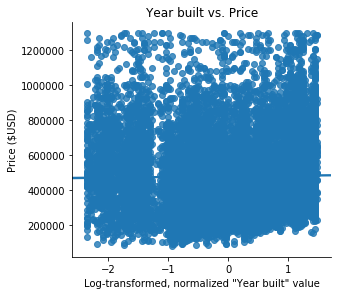

In [183]:
sns.lmplot(x='scaled_yrbuilt', y='price', data=train_df, fit_reg=True, height=4, aspect=1.2)
plt.title('Year built vs. Price')
plt.xlabel('Log-transformed, normalized "Year built" value')
plt.ylabel('Price ($USD)')
plt.show();

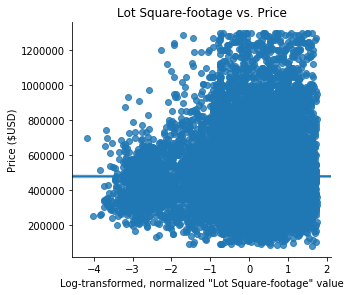

In [184]:
sns.lmplot(x='scaled_sqftlot', y='price', data=train_df, fit_reg=True, height=4, aspect=1.2)
plt.title('Lot Square-footage vs. Price')
plt.xlabel('Log-transformed, normalized "Lot Square-footage" value')
plt.ylabel('Price ($USD)')
plt.show();

# Recap of Conclusions and Recommendations

## Summary of final model
- Training Adj. R-squared = .797  (Section 4.3)
- Testing Adj. R-squared = .798  (Section 6.1)
- Degrees of freedom = 72  (Section 4.3)
- Model residuals are fairly homoskedastic  (Section 5.1.1)
- Model QQ plot shows evidence of some kurtosis but is generally normally distributed (Section 5.1.2)
- Cross-validated model RMSE = $100,037  (Section 6.2)

## Conclusions from EDA
1. The model's r-squared value is maximized at .798 when 80 features are included in the prediction.
    * NOTE:  at 80 features, multiple included features had p-values that exceeded an alpha threshold of .05, so these were ultimately removed from the final model
2. Our model's mean error in the prediction of home price based on testing data is - 2608, with a standard deviation of 99,490.
    * Approximately 68 percent of the time, the model will predict a home's price between approx. -102k and approx +97k of the home's actual price.
3. Zipcode IS a strong predictor of home value.
    * Between USD 12k and USD 700k is added to the predicted value of a home, depending on which zipcode it is in
    * The mean value added to predicted home price based on zip code is USD 249k

## Business Recommendations

1. This model is useful for predicting home price with approximately USD 100k of the actual value of a home; as such, it must be used in conjunction with our collective professional expertise and experiences for the valuing of our inventory.
2. Living square-footage and the number of bedrooms are the strongest drivers of predicted home value, suggesting that home additions are the most direct way for us to improve the value of a given home in our inventory.
3. Location remains a strong driver of home value, with zipcode acting as one of the main predictors of home price within our model:
    * Bump up the prices of any of our listed inventory in the most expensive zipcodes
    * Institute caps on the bids we make for investments in cheaper zip codes
4. The number of times a home has been viewed is another strong driver of value that we can easily take advantage of; all homes in our inventory should be showed at least 2 to 4 times before a sale price is agreed upon.